# Customer Segmentation Project

-------------------
## Context
-------------------

Customer segmentation is the process of dividing a dataset of customers into groups of similar customers based on certain common characteristics, usually for the purpose of understanding the population dataset in a better fashion. Understanding customer behavior and characteristics is usually a critical part of the marketing operations of any business or organization, with direct consequences on sales & marketing strategy. Customer segmentation is often viewed as a means to achieve a better return on investment from marketing efforts, and make organizations more efficient in terms of utilizing their money, time, and other critical resources in custom marketing strategies for different groups of customers based on their unique needs and motivations.

For example, it has been understood from various research that customer segmentation often has a huge impact on people's email engagement. Segmented campaigns often see over 100% more clicks than non-segmented campaigns, and email marketers who have segmented their audience before campaigning have reported a 6-7 times growth in their overall revenue. It has also been observed in various contexts that in today's world, individual customers prefer personalized communications and offerings that cater to their particular interests.

In the context of marketing analytics then, customer segmentation has a vital role to play in optimizing ROI. It typically involves analyzing metrics around customer engagement with various marketing activities including but not limited to, ATL (above the line) marketing activities, BTL (below the line) campaigns, and targeting personalized offers. Typically, the variables of interest are customer profiles, campaign conversion rates, and information associated with various marketing channels. Based on these feature categories, the target is to create the best possible customer segments from the given data. 

-------------------
## Objective
-------------------

Using Unsupervised Learning ideas such as Dimensionality Reduction and Clustering, the objective is to come up with the best possible customer segments using the given customer dataset.

------------------------------
## Data Dictionary
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

## Importing Libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist

# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and Silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

# Importing PCA
from sklearn.decomposition import PCA

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing TSNE
from sklearn.manifold import TSNE

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import DBSCAN and Gaussian Mixture
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the Data

In [ ]:
# loading the dataset
data = pd.read_csv("marketing_campaign.csv")

## Data Overview

### Shape of the Data

In [ ]:
# Checking the shape of the data
data.shape

(2240, 27)

* The dataset has **2,240 rows and 27 columns**

### Printing the first five rows of the data

In [ ]:
# Let's view the first 5 rows of the data
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

[5 rows x 27 columns]

In [ ]:
# Let's view the last 5 rows of the data
data.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
2235         1  13-06-2013       46       709  ...                    3   
2236         1  10-06-2014       56       406  ...                    2   
2237         0  25-01-2014       91       908  ...                    3   
2238         1  24-01-2014        8       428  ...                    5   
2239         1  15-10-2012       40        84  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
2235             0             0             0         0         0  
2236             0             1             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[5 rows x 27 columns]

### **Let us check the data types and missing values of each column** 

In [ ]:
# Let's check the datatypes of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* Out of 27 columns, 24 columns are numeric and 3 columns are of object data type.
* There are a few missing values in the Income variable. Let's check the percentage of missing values.
* The ID column is an identifier which is unique for each customer. We can drop this column as it will not add any value to the analysis. 

**Let's check the percentage of missing values in each of the column**

In [ ]:
# Finding the percentage of missing values in each column of the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

ID                     0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 1.07
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntGoldProds           0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
Complain               0.00
Response               0.00
dtype: float64

**Observation:** 

- Income column has **1.07% missing values**. We will treat the missing values after exploring the column in EDA.

We can observe that `ID` has no null values. Also the number of unique values are equal to the number of observations. So, `ID` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

**Dropping the ID column**

In [ ]:
# Dropping ID column
data.drop(["ID"], axis=1, inplace=True)

**Let's start exploring the data**

## Exploratory Data Analysis

###  Statistical summary 

In [ ]:
# Let's view the statistical summary of numerical columns in the data
data.describe().T

count          mean           std     min       25%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.012946      0.113069     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Response                 0.0      0.00       1.0

**Observations:** 

- The `Year_Birth` variable contains the year of birth of the customer, which is not very useful for the analysis. Late, we can extract the age of the customer using this column.
- Income has a max value of 666666, which is far greater than the mean and could be an outlier.
- Columns - `Income, MntFruits, MntWines, MntMeatProducts, MntFishProducts, MntSweetProducts` might have outliers on the right end as there is a large difference between 75th percentile and maximum values.
- Highest mean amount spent per customer in the last two years is on wines (approx 304), followed by meat products (approx 167).
- On average, the number of purchases from the store and website is approximately the same. We can say that the customers prefer both online and offline purchases.
- There are many variables that are very skewed and have value for very few customers, for example, AcceptedCmp1. We are more likely to skip those variables at latest stage because they might not help with the analysis. 

Now, let's explore categorical variables. We can check the value counts of each category in each of the categorical columns. 

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [ ]:
# List of the categorical columns in the data
cols = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain"]

In [ ]:
for i in cols:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Education are :
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Kidhome are :
0    1293
1     899
2      48
Name: Kidhome, dtype: int64
**************************************************
Unique values in Teenhome are :
0    1158
1    1030
2      52
Name: Teenhome, dtype: int64
**************************************************
Unique values in Complain are :
0    2219
1      21
Name: Complain, dtype: int64
**************************************************


**Observations:**
- In education, 2n cycle and Master means the same thing. We can combine these two categories.
- There are many categories in marital status. We can combine the categories 'Alone', 'Absurd', and 'YOLO' with 'Single'.
- There are only 0.01% customers who complained in the last two years.
- The most common educational status is Graduation.
- The most common marital status is Married.
- There are 3 sub-categories in Kidshome, and most of the customers are single or do not have kids in their homes. 
- There are 3 sub-categories in Teenhome, and most of the customers are single or do not have Teens in their homes.

### **Let us replace  the "2n Cycle" category with "Master" in Education and "Alone", "Absurd, and "YOLO" with "Single" in Marital_Status**

In [ ]:
# Replacing 2n Cycle with Master

data["Education"].replace("2n Cycle", "Master", inplace = True)

In [ ]:
# Replacing Alone, Abusrd, YOLO with Single

data["Marital_Status"].replace(["Alone","Absurd", "YOLO"], "Single", inplace = True)

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms help to visualize and describe numerical data. We can also use other plots like box plot to analyze the numerical columns.

#### Let us plot histogram for the feature 'Income' to understand the distribution and outliers, if any.

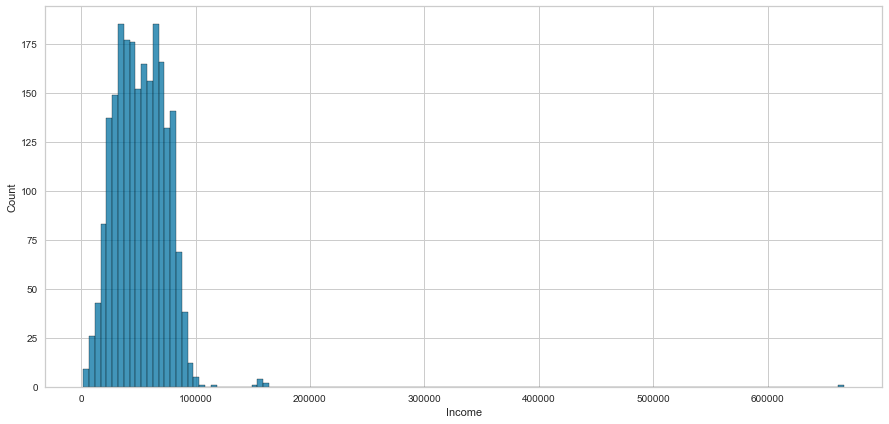

In [ ]:
# Create histogram for the Income feature

plt.figure(figsize=(15, 7))
sns.histplot(x="Income", data=data)
plt.show()

**We could observe some extreme value on the right side of the distribution of the 'Income' feature. Let's use a box plot as it is more suitable to identify extreme values in the data.** 

<AxesSubplot:xlabel='Income'>

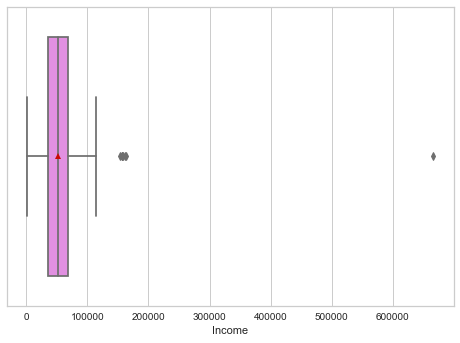

In [ ]:
# Plot the boxplot
sns.boxplot(data=data, x=data["Income"], showmeans=True, color="violet")

**Observations:**

- We can observe from the boxplot that there are some outliers in the income variable.
- Let's find the value at the upper whisker to check how many observations are marked as outliers.

In [ ]:
# Calculating the upper whisker for the Income variable

Q1 = data.quantile(q=0.25)                          # Finding the first quartile

Q3 = data.quantile(q=0.75)                          # Finding the third quartile

IQR = Q3 - Q1                                       # Finding the Inter Quartile Range

upper_whisker = (Q3 + 1.5 * IQR)["Income"]          # Calculating the Upper Whisker

print(upper_whisker)                                # Printing Upper Whisker

118350.5


In [ ]:
# Checking the observations marked as outliers
data[data.Income > upper_whisker]

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
164         1973         PhD        Married  157243.0        0         1   
617         1976         PhD       Together  162397.0        1         1   
655         1975  Graduation       Divorced  153924.0        0         0   
687         1982         PhD        Married  160803.0        0         0   
1300        1971      Master       Together  157733.0        1         0   
1653        1977  Graduation       Together  157146.0        0         0   
2132        1949         PhD        Married  156924.0        0         0   
2233        1977  Graduation       Together  666666.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
164   01-03-2014       98        20          2  ...                   22   
617   03-06-2013       31        85          1  ...                    0   
655   07-02-2014       81         1          1  ...                    0   
687   04-08-2012       21        55         16  ...                   28   
1300  04-06-2013       37        39          1  ...                    0   
1653  29-04-2013       13         1          0  ...                   28   
2132  29-08-2013       85         2          1  ...                    0   
2233  02-06-2013       23         9         14  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
164                   0                  0             0             0   
617                   1                  1             0             0   
655                   0                  0             0             0   
687                   1                  0             0             0   
1300                  1                  1             0             0   
1653                  0                  1             0             0   
2132                  0                  0             0             0   
2233                  3                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
164              0             0             0         0         0  
617              0             0             0         0         0  
655              0             0             0         0         0  
687              0             0             0         0         0  
1300             0             0             0         0         0  
1653             0             0             0         0         0  
2132             0             0             0         0         0  
2233             0             0             0         0         0  

[8 rows x 26 columns]

In [ ]:
data.quantile(q=0.99644).Income

118339.77400001354

**Observation:**

- We can observe that the **income for at least 99.5% of customers is less than the upper whisker**. 

In [ ]:
# Dropping 8 observations using their indices 
data.drop(index=[2233, 1300 ,164,617,687,1653,2132,655], inplace=True)

**Now, let's check the distribution of the Income variable after dropping outliers.**

Text(6.084999999999994, 0.5, 'count')

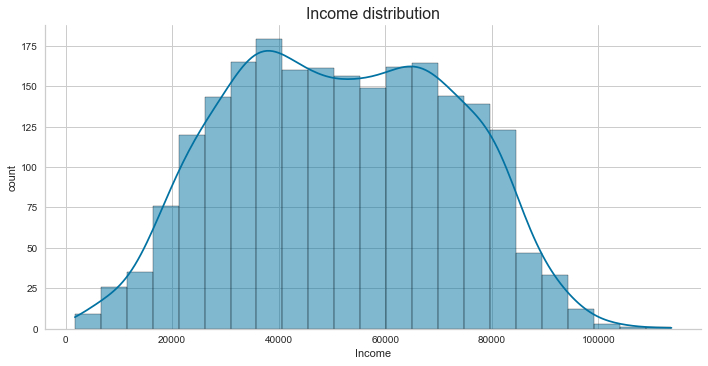

In [ ]:
sns.displot(data["Income"], kde=True, height=5, aspect=2)

plt.title("Income distribution", size=16)

plt.ylabel("count")

**Observation:**

- After treating outliers, the skewness in the distribution has reduced for the income variable. The distribution seems normally distributed.

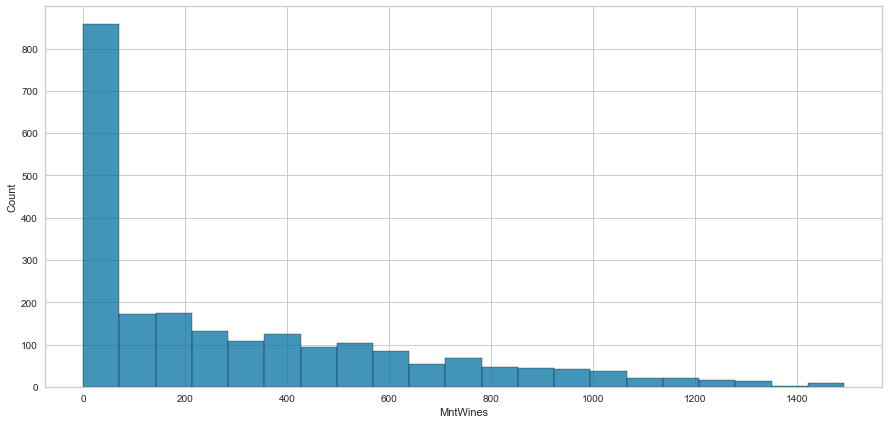

In [ ]:
# Create histogram for the MntWines feature

plt.figure(figsize=(15, 7))
sns.histplot(x="MntWines", data=data)
plt.show()

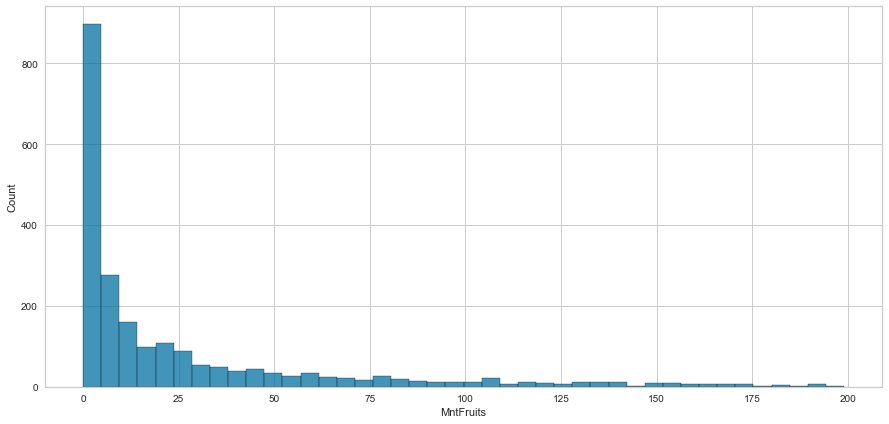

In [ ]:
# Create histogram for the MntFruits feature

plt.figure(figsize=(15, 7))
sns.histplot(x="MntFruits", data=data)
plt.show()

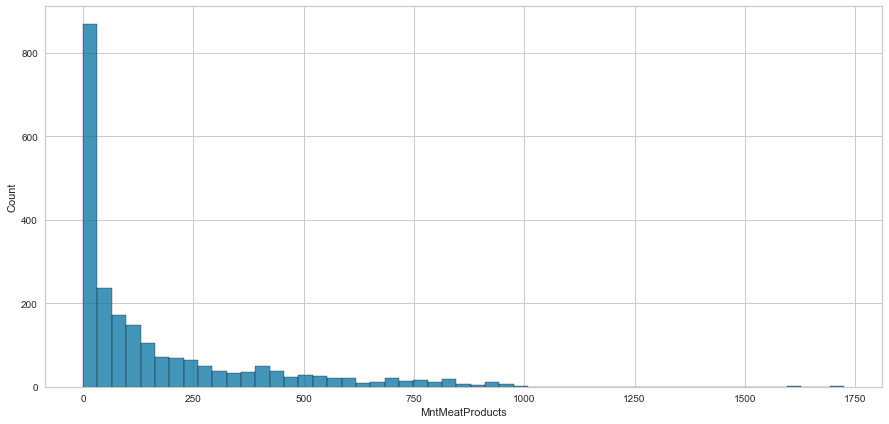

In [ ]:
# Create histogram for the MntMeatProducts feature

plt.figure(figsize=(15, 7))
sns.histplot(x="MntMeatProducts", data=data)
plt.show()

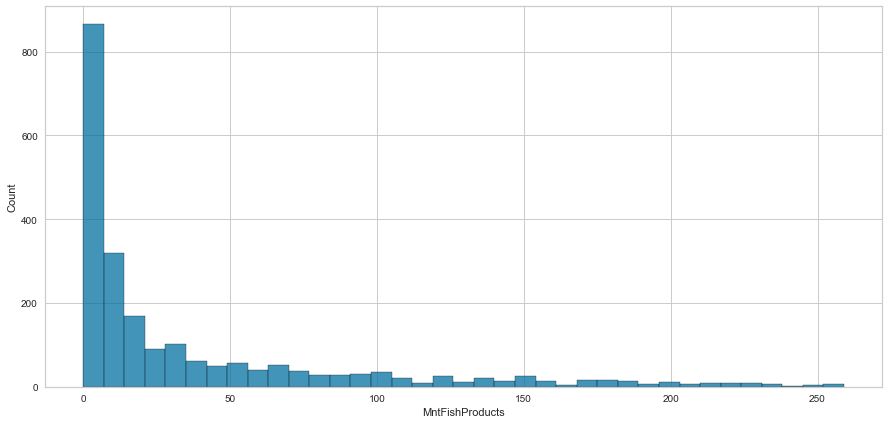

In [ ]:
# Create histogram for the MntFishProducts feature

plt.figure(figsize=(15, 7))
sns.histplot(x="MntFishProducts", data=data)
plt.show()

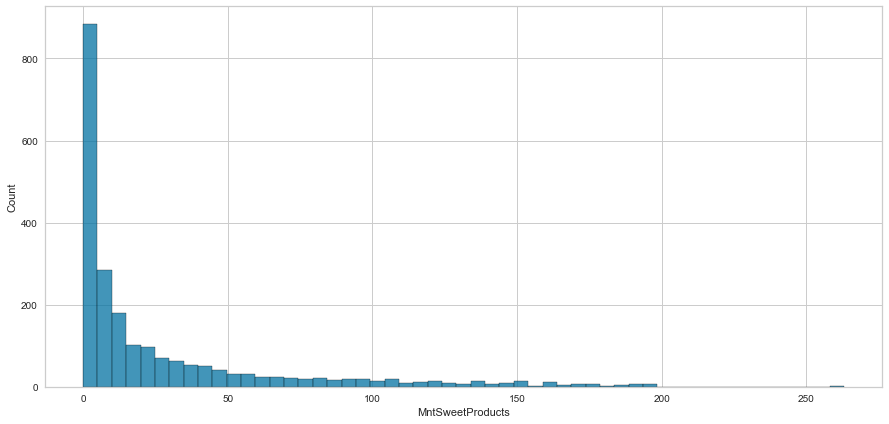

In [ ]:
# Create histogram for the MntSweetProducts feature

plt.figure(figsize=(15, 7))
sns.histplot(x="MntSweetProducts", data=data)
plt.show()

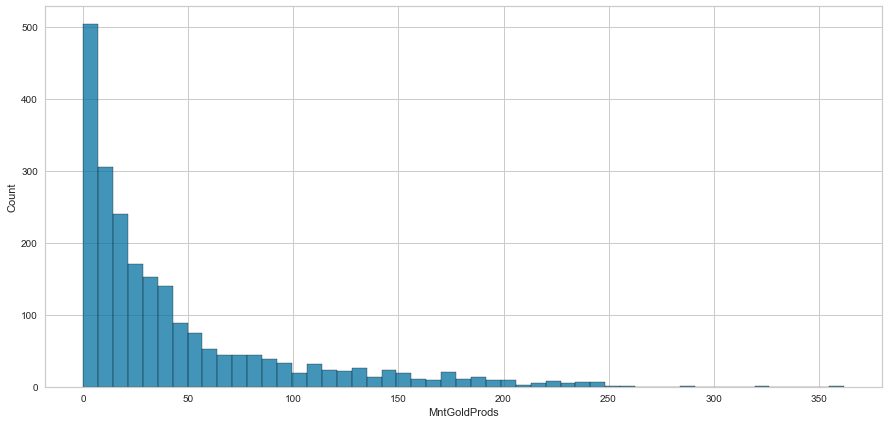

In [ ]:
# Create histogram for the MntGoldProducts feature

plt.figure(figsize=(15, 7))
sns.histplot(x="MntGoldProds", data=data)
plt.show()

**Observations:**  

* `MntWines, MntFruits, MntMeatProducts, MntFishProduct, MntSweetProducts,` and `MntGoldProducts` have a right skewed distribution. On comparing the amount spent on each product, the majority of the customers spend more on wine and meat products.

## **2. Univariate analysis - Categorical Data**

Let us write a function that will help us create bar plots that indicate the percentage for each category. This function takes the categorical column as the input and returns the bar plot for the variable.

In [ ]:
def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z])                                          # Length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05                  # Width of the plot
        y = p.get_y() + p.get_height()                            # Height of the plot
        
        ax.annotate(percentage, (x, y), size = 12)                # Annotate the percentage 
    
    plt.show()                                                    # Show the plot

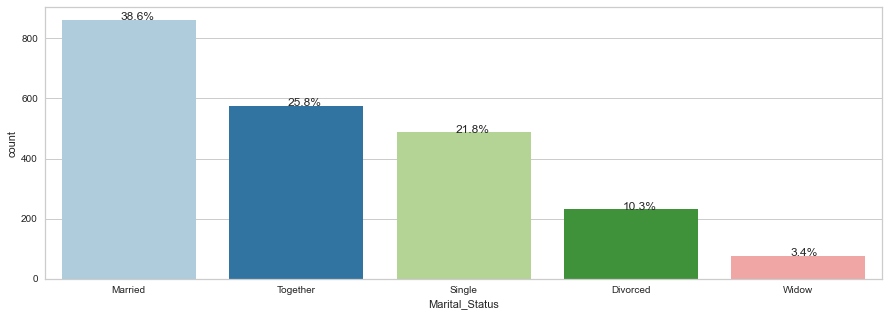

In [ ]:
# Bar plot for 'Marital_Status'
perc_on_bar('Marital_Status')

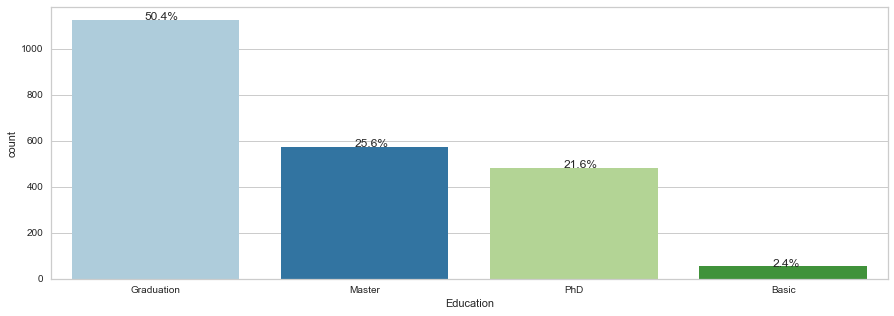

In [ ]:
# Bar plot for 'Education'
perc_on_bar('Education')

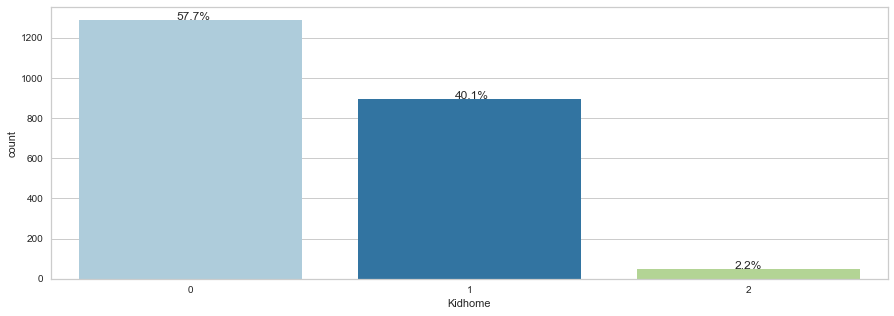

In [ ]:
# Bar plot for 'Kidhome'
perc_on_bar('Kidhome')

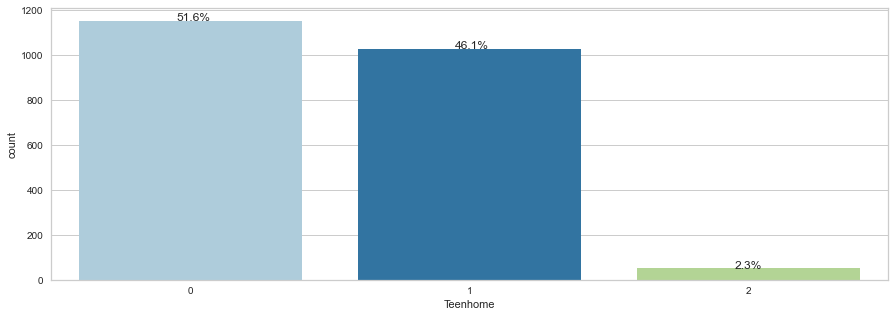

In [ ]:
# Bar plot for 'Teenhome'
perc_on_bar('Teenhome')

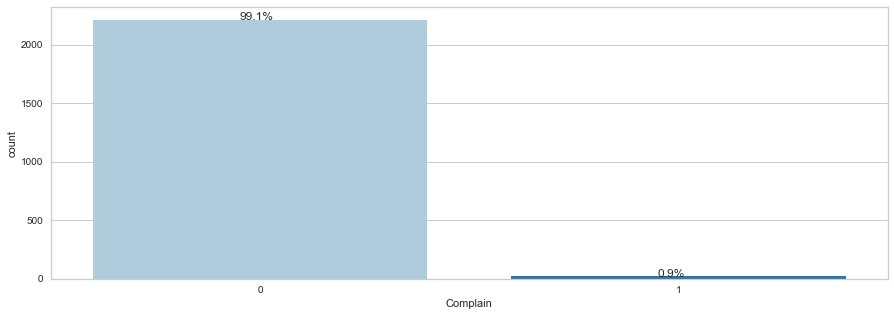

In [ ]:
# Bar plot for 'Complain'
perc_on_bar('Complain')

**Observations**

- `Marital_Status`: 38% of the customers are married
- `Education`: Most of the customers have completed Graduation. 
- `Kidhome` and `Teenhome`: Most of the customers don't have Kids/Teens. 
- `Complain`: About 99% of the customers never complained, which is a good sign for the company.

## **Bivariate Analysis**

We have analyzed different categorical and numerical variables. Now, let's check how different variables are related to each other.

### **Correlation Heat map**
Heat map can show a 2D correlation matrix between numerical features.

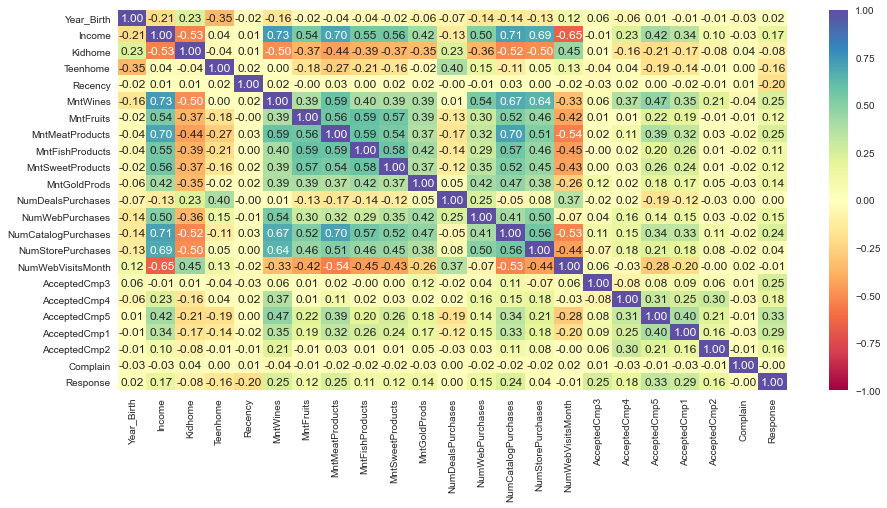

In [ ]:
plt.figure(figsize=(15, 7))                                                        # Setting the plot size
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")  # Plotting the correlation plot
plt.show()

**Observations:** 
- `NumCatalogPurchases` have stronger correlation with amount spent on different product in comparison to other channels, indicating that the customers buying from catalog spend more in comparison to customers buying from other channels.
- `MntWines` has strong and equal positive correlation with `NumCatalogPurchases` and `NumStorePurchases`, indicating that amount spent on wines is higher for customers buying from stores and catalogs in comparison to other channels.
- `Income` and `NumWebVisitsMonth` have strong negative correlation, indicating that customers with high income do not visit the web.
- `NumDealsPurchase` and `Income` are almost zero correlation, indicating that there is no linear relationship between income of the customer and deal purchases. `Income` is positively correlated with all other channels, which make sense as income of customers increase, they tend to purchase more.
- `Kidhome` and `MntWines` are negatively correlated, implying that customers with Kids spend less on wine products.
- `Teenhome` and `NumDealPurchases` are positively correlated, indicating that customers with teens in their homes will look for discounts while purchasing products.

**We have observed above that the income is an important variable having strong positive correlation with the amount spent on different products. However, the above correlation heatmap only shows the relationship of income with numerical variables. Let's check the relationship of income with categorical variables.**

### **Education Vs Income**

<AxesSubplot:xlabel='Education', ylabel='Income'>

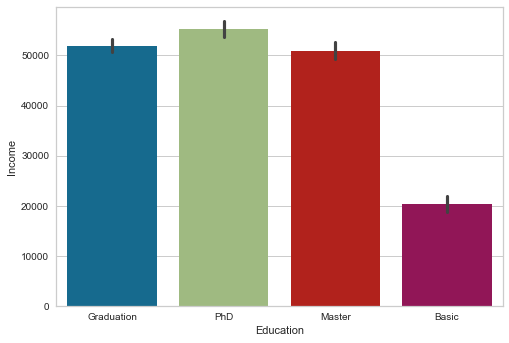

In [ ]:
sns.barplot(x="Education", y="Income", data=data)

**Observations:**

- The average incomes of customers in "Graduation", "Master", and "PhD" are similar.
- Since all the categories with similar income are post-graduate, we can combine these categories and have a binary variable with two categories as Post Graduate and Basic.

### **Marital Status Vs Income**

<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

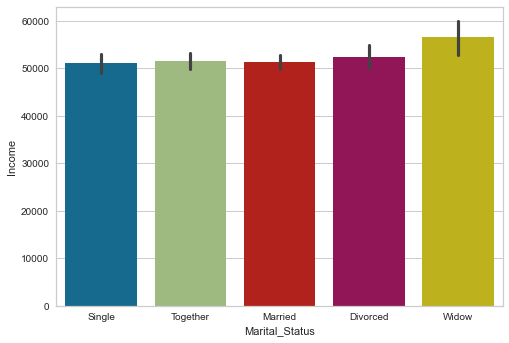

In [ ]:
sns.barplot(x="Marital_Status", y="Income", data=data)

**Observations:**

* It is interesting to see there is **no major difference in the average household income of the customers for different categories of marital status.**
* We can further check if there is a difference in average household income for customers having kids and customers not having kids. 

### **Kidhome Vs Income**

<AxesSubplot:xlabel='Kidhome', ylabel='Income'>

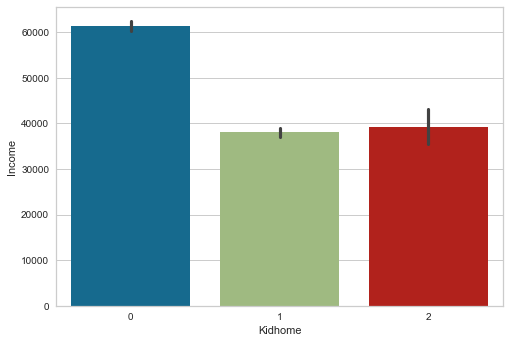

In [ ]:
sns.barplot(x="Kidhome", y="Income", data=data)

**Observation:**

- **Customers with no kids at home have higher average income** in comparison to the customers having 1 or 2 kids. 

**We can also visualize the relationship between two categorical variables.**

### **Marital_Status Vs Kidhome**

<AxesSubplot:xlabel='Marital_Status'>

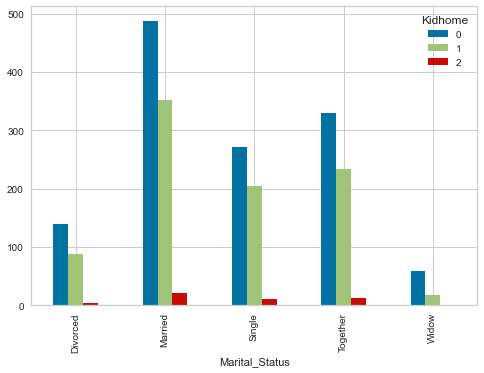

In [ ]:
pd.crosstab(data['Marital_Status'],data['Kidhome']).plot(kind="bar",stacked=False)

**Observation:**

- Every category in the Marital Status variable has at least one Kid.

## **Feature Engineering and Data Processing**

In this section, we will first prepare our dataset for analysis.
- Creating new columns
- Imputing missing values

### Age 
* We can find age of the customers from the Year_Birth column and add it as a new feature.
* To calculate age, we'll subtract the year 2016 because variables account for the last 2 years and we have customers registered till 2014 only.
* We need to convert strings values to dates first to use subtraction.

In [ ]:
# Extracting only the year from the Year_Birth variable and subtracting it from 2016
data["Age"] = 2016 - pd.to_datetime(data["Year_Birth"], format="%Y").apply(lambda x: x.year) 

# Sorting the values in ascending order 
data["Age"].sort_values()                                         

1170     20
46       20
696      21
747      21
1850     21
       ... 
424      75
1950     76
192     116
339     117
239     123
Name: Age, Length: 2232, dtype: int64

**Observations:**

* We can see that there are 3 observations with ages greater than 100, i.e., 116, 117, and 123 which is highly unlikely to be true or can be considered as outliers as the next oldest age is 76.
* Since there are only 3 such observations with age greater than 100, we can drop them.

In [ ]:
# Dropping the 3 observations with age > 100
data.drop(data[data["Age"] > 100].index, inplace=True)

**Now, let's check the distribution of age in the data**

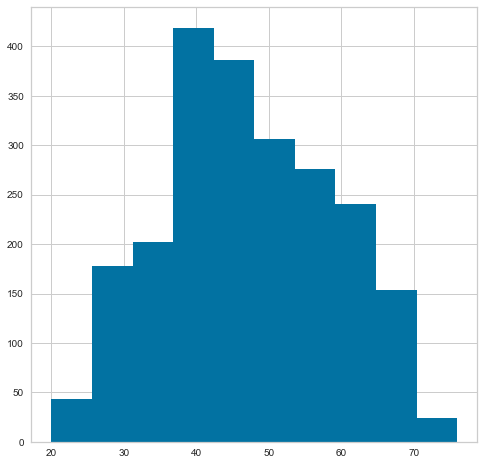

In [ ]:
data["Age"].hist(figsize=(8, 8))
plt.show()

**Observations:**

* Age variable seems to be normally distributed.
* The distribution has a peak at around 40 and the age of majority of customers lie between 40 and 60.

### Kids 
* Let's create feature "Kids" indicating the total kids and teens in the home.

In [ ]:
# Adding Kidhome and Teenhome variables
data["Kids"] = data["Kidhome"] + data["Teenhome"]

### Family Size
* Let's create a new variable called 'Family Size' to find out how many members each family has.
* For this, we need to have a look at the Marital_Status variable, and see what are the sub-categories. 

In [ ]:
data["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

* Now, we can combine the sub-categories Single, Divorced, Widow as "Single" and we can combine the sub-categories Married and Together as "Relationship" 
* Then we can create a new variable called "Status" and assign values 1 and 2 to categories Single and Relationship, respectively.
* Then, we can use the Kids (calculated above) and the Status column to find the family size.

In [ ]:
# Replacing Married and Together with Relationship
data["Marital_Status"] = data["Marital_Status"].replace(["Married", "Together"], "Relationship")

# Replacing remaining sub categories with Single
data["Marital_Status"] = data["Marital_Status"].replace(["Divorced", "Widow"], "Single")

In [ ]:
# Feature for total members in the household

# Replacing single with 1 and relationship with 2
data["Status"] = data["Marital_Status"].replace({"Single": 1, "Relationship": 2}) 

# Adding two variables Status and Kids to get the total number of persons in each family
data["Family_Size"] = data["Status"] + data["Kids"]                                

### Expenses 
* Let's create a new feature called "Expenses", indicating the total amount spent by the customers in various products over the span of two years.

In [ ]:
# Adding all the amount spent on each of product
data["Expenses"] = (data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"])

### Total Purchases
* Let's create a new feature called "NumTotalPurchases", indicating the total number of products purchased by the customers.

In [ ]:
# Adding all the number of purchases from every channel
data["NumTotalPurchases"] = (data["NumWebPurchases"]+ data["NumCatalogPurchases"]+ data["NumStorePurchases"]+ data["NumDealsPurchases"])

### Engaged in Days
* Let's create a new feature called "Engaged in days", indicating how long the customer has been with the company.

In [ ]:
# Converting Dt_customer variable to Python Date time object
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])  

Let's check the max and min of the date.

In [ ]:
# Check the minimum of the date
data.Dt_Customer.min()

Timestamp('2012-01-08 00:00:00')

In [ ]:
# Check the maximum of the date
data.Dt_Customer.max()

Timestamp('2014-12-06 00:00:00')

Since the last customer enrolled in the supermarket on December 6th, 2014, let's use January 1st, 2015 as a date (threshold) to calculate the number of days each customer was enrolled with the company.

In [ ]:
 # Assigning date to the day variable
data["day"] = "01-01-2015"                         

In [ ]:
# Converting the variable day to Python Date time object
data["day"] = pd.to_datetime(data.day)              

In [ ]:
# Getting the days for each of the customer and subtracting it from the threshold
data["Engaged_in_days"] = (data["day"] - data["Dt_Customer"]).dt.days     

### TotalAcceptedCmp
* Let's create a new feature called "TotalAcceptedCmp" that shows how many offers customers have accepted.

In [ ]:
# Adding all the campaign related variables to get the total number of offers accepted by a customer
data["TotalAcceptedCmp"] = (data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]+ data["Response"])

### **AmountPerPurchase**
* Let's create a new feature called "AmountPerPurchase" indicating the amount spent per purchase.

In [ ]:
data['AmountPerPurchase'] = data['Expenses']/data['NumTotalPurchases']

In [ ]:
max(data['AmountPerPurchase'])

inf

* Few customers have not purchased any of the products, so the NumTotalPurchases is 0. This is resulting in infinity value. Let's look at those customers.

In [ ]:
data.loc[data['NumTotalPurchases'] == 0]

Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
981         1965  Graduation         Single  4861.0        0         0   
1524        1973  Graduation         Single  3502.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  ...  Age  Kids  Status  \
981   2014-06-22       20         2          1  ...   51     0       1   
1524  2013-04-13       56         2          1  ...   43     1       1   

      Family_Size  Expenses  NumTotalPurchases        day  Engaged_in_days  \
981             1         6                  0 2015-01-01              193   
1524            2         5                  0 2015-01-01              628   

      TotalAcceptedCmp  AmountPerPurchase  
981                  0                inf  
1524                 0                inf  

[2 rows x 36 columns]

In [ ]:
# Dropping 2 observations using their indices 
data.drop(index=[981, 1524], inplace=True)

**Now, let's check the distribution of values in ProductPurchaseRate column.**

In [ ]:
data["AmountPerPurchase"].describe()

count    2227.000000
mean       33.274270
std        45.040897
min         0.533333
25%         9.714286
50%        23.352941
75%        45.281773
max      1679.000000
Name: AmountPerPurchase, dtype: float64

Text(6.084999999999994, 0.5, 'count')

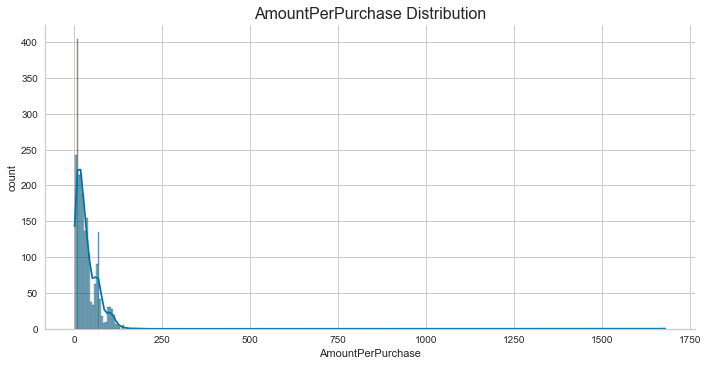

In [ ]:
sns.displot(data["AmountPerPurchase"], kde=True, height=5, aspect=2)

plt.title("AmountPerPurchase Distribution", size=16)

plt.ylabel("count")

**Observations:**

- We observe that the at least 75% customers spend around 45 USD or less per purchase.
- The distribution of ProductPurchaseRate is highly right-skewed, indicating some customers are spending much more on each purchase. These might be rich customers who like to purchase expensive products. 

### **Imputing Missing Values**

In [ ]:
# Imputing the missing values in the Income variable with the median
data["Income"] = data["Income"].fillna(data["Income"].median())

**Now that we are done with data preprocessing, let's visualize new features against the new income variable we have after imputing missing values.**

### Income Vs Expenses

Text(0, 0.5, 'Expenses')

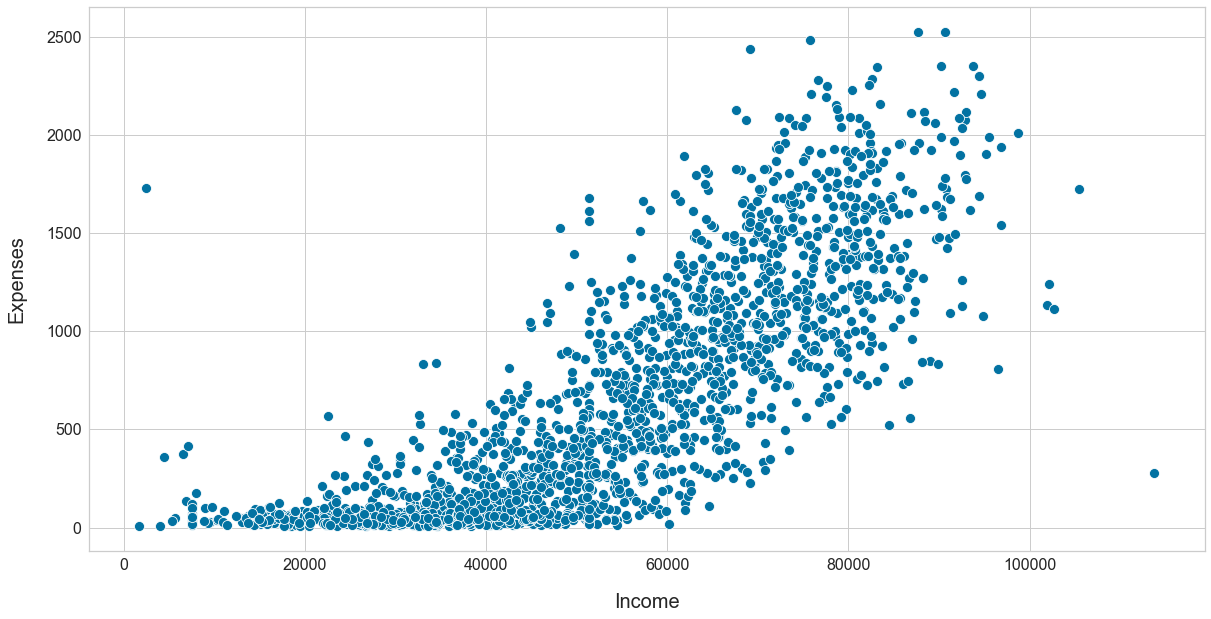

In [ ]:
plt.figure(figsize=(20, 10))                                    # Setting the plot size
sns.scatterplot(x=data.Income, y=data.Expenses, s=100)          # Plotting the scatter plot 
plt.xticks(fontsize=16)                                         # Font size of X-label
plt.yticks(fontsize=16)                                         # Font size of Y-label
plt.xlabel("Income", fontsize=20, labelpad=20)                  # Title of X-axis
plt.ylabel("Expenses", fontsize=20, labelpad=20)                # Title of Y-axis

**Observations:**

* The relationship for Income and Expenses seems linear. 
* **Customers having higher income are spending more.**

###  Income Vs Family Size

AxesSubplot(0.125,0.125;0.775x0.755)


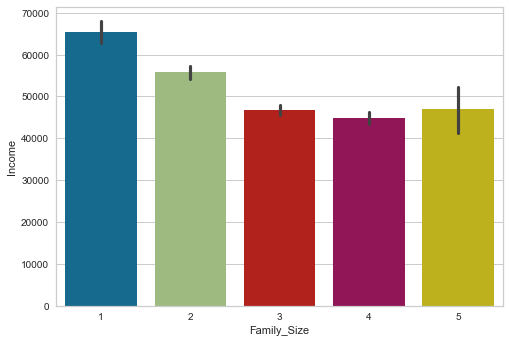

In [ ]:
# Plotting the bar plot for Family Size on X-axis and Income on Y-axis
print(sns.barplot(x="Family_Size", y="Income", data=data))

**Observation:**

* Even though there are less number of observations for the Single category, Single customers have a higher average income.
* Except for family size of 5, the average income is decreasing as the family size increases.

# **Customer Segmentation**

# **Milestone 2**

**Note:** This is in continuation to the data preprocessing we did in Milestone 1. Results might differ if you have followed different steps in data preprocessing. 

## Preparing Data for Segmentation

### Dropping columns that we will not use for segmentation

The decision about which variables to use for clustering is a critically important decision that will have a big impact on the clustering solution. So we need to think carefully about the variables we will choose for clustering. Clearly, this is a step where a lot of contextual knowledge, creativity, and experimentation/iterations are needed.

Moreover, we often use only a few of the data attributes for segmentation (the segmentation attributes) and use some of the remaining ones (the profiling attributes) only to profile the clusters. For example, in market research and market segmentation, we can use behavioral data for segmentation (to segment the customers based on their behavior like amount spent, units bought, etc.), and then use both demographic as well as behavioral data for profiling the segments found.

Here, we will use the behavioral attributes for segmentation and drop the demographic attributes like Income, Age, and Family_Size. In addition to this, we need to drop some other columns which are mentioned below.

* `Dt_Customer`: We have created the `Engaged_in_days` variable using the Dt_Customer variable. Hence, we can drop this variable as it will not help with segmentation.
* `Complain`: About 95% of the customers didn't complain and have the same value for this column. This variable will not have a major impact on segmentation. Hence, we can drop this variable. 
* `day`:  We have created the `Engaged_in_days` variable using the 'day' variable. Hence, we can drop this variable as it will not help with segmentation.
* `Status`: This column was created just to get the `Family_Size` variable that contains the information about the Status. Hence, we can drop this variable.
* We also need to drop categorical variables like `Education` and `Marital_Status`, `Kids`, `Kidhome`, and `Teenhome` as distance-based algorithms cannot use the default distance like Euclidean to find the distance between categorical and numerical variables.
* We can also drop categorical variables like `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, and `Response` for which we have create the variable `TotalAcceptedCmp` which is the aggregate of all these variables.

In [ ]:
# Dropping all the irrelevant columns and storing in data_model
data_model = data.drop(
    columns=[
        "Year_Birth",
        "Dt_Customer",
        "day",
        "Complain",
        "Response",
        "AcceptedCmp1",
        "AcceptedCmp2",
        "AcceptedCmp3",
        "AcceptedCmp4",
        "AcceptedCmp5",
        "Marital_Status",
        "Status",
        "Kids",
        'Education',
        'Kidhome',
        'Teenhome', 'Income','Age', 'Family_Size'
    ],
    axis=1,
)

In [ ]:
# Check the shape of new data 
data_model.shape

(2227, 17)

In [ ]:
# Check first five rows of new data
data_model.columns

Index(['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Expenses',
       'NumTotalPurchases', 'Engaged_in_days', 'TotalAcceptedCmp',
       'AmountPerPurchase'],
      dtype='object')

**Let's plot the correlation plot after we've removed the irrelevant variables.**

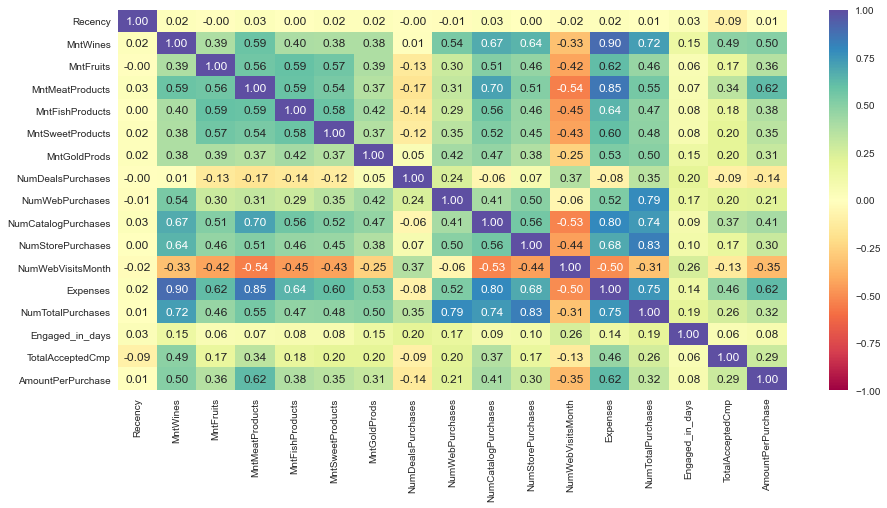

In [ ]:
# Plot the correlation plot for new data
plt.figure(figsize=(15, 7))                                                        # Setting the plot size
sns.heatmap(data_model.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")  # Plotting the correlation plot
plt.show()

### Scaling the Data

**What is feature scaling?**

Feature scaling is a class of statistical techniques that, as the name implies, scales the features of our data so that they all have a similar range. You'll understand better if we look at an example:

If you have multiple independent variables like Age, Income, and Amount related variables, with their range as (18–100 Years), (25K–75K), and (100–200), respectively, feature scaling would help them all to be in the same range.

**Why feature scaling is important in Unsupervised Learning?**

Feature scaling is especially relevant in machine learning models that compute some sort of distance metric as we do in most clustering algorithms, for example, K-Means. 

So, scaling should be done to avoid the problem of one feature dominating over others because the unsupervised learning algorithm uses distance to find the similarity between data points.

**Let's scale the data**

**Standard Scaler**: StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

![SC.png](attachment:SC.png)

1. Data standardization is the process of rescaling the attributes so that they have a mean of 0 and a variance of 1.
2. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
3. In sklearn.preprocessing.StandardScaler(), centering and scaling happen independently on each feature.

In [ ]:
# Applying standard scaler on the data
scaler = StandardScaler()                                            # Storing the Standard Scaler function in scaler

df_scaled = scaler.fit_transform(data_model)                         # Fitting the scaler function on the data

df_scaled = pd.DataFrame(df_scaled, columns=data_model.columns)      # Converting the embeddings to a dataframe

df_scaled.head()

## **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

### **Applying T-SNE**

<AxesSubplot:xlabel='0', ylabel='1'>

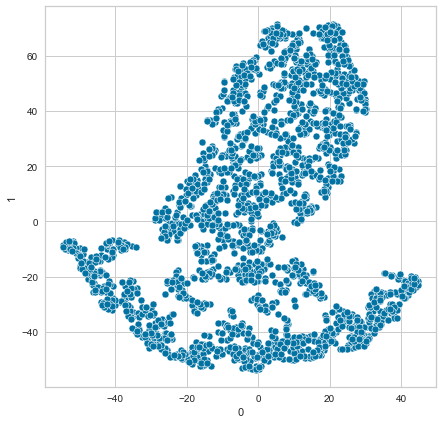

In [ ]:
# Fitting T-SNE with number of components equal to 2 to visualize how data is distributed

tsne = TSNE(n_components=2, random_state=1, perplexity=35)                    # Initializing TSNE function with 2 components

data_air_pol_tsne = tsne.fit_transform(data_model)                            # Applying TSNE on sub set of data

data_air_pol_tsne = pd.DataFrame(data_air_pol_tsne, columns=[0, 1])           # Converting the embeddings to a dataframe

plt.figure(figsize=(7, 7))                                                    # Scatter plot for two components
sns.scatterplot(x=0, y=1, data=data_air_pol_tsne)                             # Plotting TSNE

**Think about it:**
- Why should PCA be used on data before applying clustering methods?

When the variables used in clustering are highly correlated, it causes multicollinearity, which affects the clustering method and results in poor cluster profiling (or biased toward a few variables). PCA can be used to reduce the multicollinearity between the variables. 

### **Applying PCA**

In [ ]:
# Defining the number of principal components to generate
n = data_model.shape[1]                                         # Storing the number of variables in the data

pca = PCA(n_components=n, random_state=1)                       # Storing PCA function with n components

data_pca = pd.DataFrame(pca.fit_transform(df_scaled))          # Applying PCA on scaled data

# The percentage of variance explained by each principal component is stored
exp_var = (pca.explained_variance_ratio_)                       

**Let's plot the first two components and see how the data points are distributed.**

<AxesSubplot:xlabel='0', ylabel='1'>

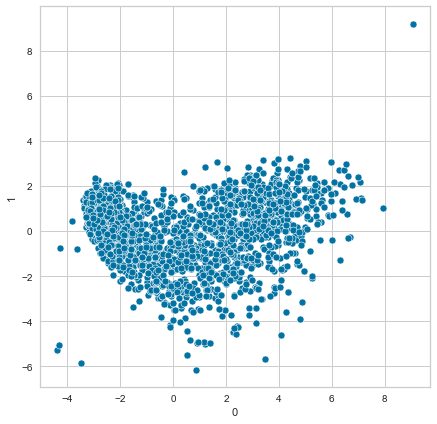

In [ ]:
# Scatter plot for two components
plt.figure(figsize=(7, 7))                                      # Setting the plot size

sns.scatterplot(x=0, y=1, data=data_pca)  

**PCA is also used to reduce dimensionality. However, dimensionality reduction is not preferred in clustering because we want more variables that explain the data better, which will aid in segmenting the data. So, we will be using all the Principal Components.**

#### Let's apply cluster algorithms on PCA data

## **K-Means** 

In [ ]:
distortions = []                                                  # Create a empty list

K = range(2, 10)                                                  # Setting the K range from 2 to 10

for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=4)                             # Initialize KMeans
    kmeanModel.fit(data_pca)                                      # Fit KMeans on the data
    distortions.append(kmeanModel.inertia_)                       # Append distortion values to the empty list created above

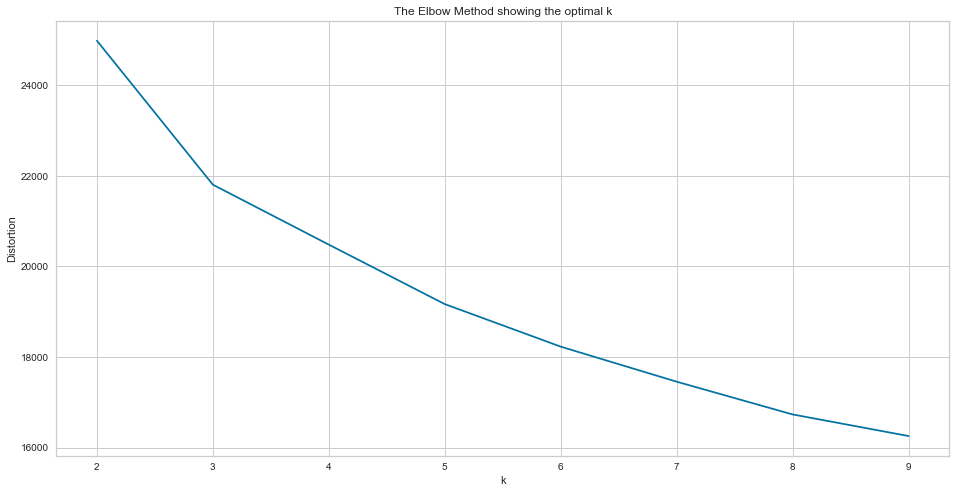

In [ ]:
# Plotting the elbow plot
plt.figure(figsize=(16, 8))                                            # Setting the plot size

plt.plot(K, distortions, "bx-")                                        # Plotting the K in X-axis and distortions in y-axis

plt.xlabel("k")                                                        # Title of x-axis

plt.ylabel("Distortion")                                               # Title of y-axis

plt.title("The Elbow Method showing the optimal k")                    # Title of the plot
plt.show()

**In the above plot, the elbow is seen for K=3 and 5, but if you observe the Average distortion results, there is some drop in distortion at K= 5**

**Think About It:**

- How do we determine the optimal K value when the elbows are observed at 2 or more K values from the elbow curve?
- Which metric can be used to determine the final K value?

**We can use the silhouette score as a metric for different K values to make a better decision about picking the number of clusters(K).**

### **What is the silhouette score?**

Silhouette score is one of the methods for evaluating the quality of clusters created using clustering algorithms such as K-Means. The silhouette score is a measure of how similar an object is to its cluster (cohesion) compared to other clusters (separation). Silhouette score has a range of [-1, 1].

* Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. 
* Silhouette score near -1 indicates that those samples might have been assigned to the wrong cluster.

#### Finding silhouette score for each K value

In [ ]:
sil_score = []                                                              # Create empty list
cluster_list = range(3, 7)                                                 # Creating a list of range from 3 to 7
for n_clusters in cluster_list:
    
    # Initializing KMeans algorithm
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    
    # Predicting on the pca data
    preds = clusterer.fit_predict((data_pca)) 
    
     # Calculating silhouette score for each of the K value
    score = silhouette_score(data_pca, preds)  
    
    # Appending silhouette score to empty list created above
    sil_score.append(score)         
    
    # printing the silhouette score for each k
    print( "For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))  

For n_clusters = 3, the silhouette score is 0.27163034118844354)
For n_clusters = 4, the silhouette score is 0.25165779932105725)
For n_clusters = 5, the silhouette score is 0.23159968769411537)
For n_clusters = 6, the silhouette score is 0.23886696654352618)


**From the above silhouette scores, 3 appears to be a good value of K. So, let's build K-Means using K=3.** 

### **Applying KMeans on the PCA data**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1)                # Initializing the KMeans algorithm with 3 clusters

kmeans.fit(data_pca)                                         # Applying on scaled data

KMeans(n_clusters=3, random_state=1)

In [ ]:
data_pca["K_means_segments_3"] = kmeans.labels_                    # Adding KMeans cluster labels to the PCA data

data["K_means_segments_3"] = kmeans.labels_                        # Adding KMeans cluster labels to the whole data

data_model["K_means_segments_3"] = kmeans.labels_                  # Adding KMeans cluster labels to the subset of data

In [ ]:
# Let's check the distribution
data_model["K_means_segments_3"].value_counts()

1    1058
0     607
2     562
Name: K_means_segments_3, dtype: int64

**Let's visualize the clusters from PCA.**

In [ ]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

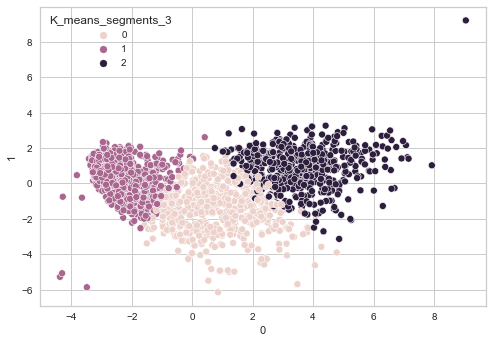

In [ ]:
PCA_PLOT(0, 1, data_pca, "K_means_segments_3")

### **Cluster Profiling**

In [ ]:
# Taking the mean of all the variables by cluster wise
cluster_profile_KMeans_3 = data.groupby("K_means_segments_3").mean()

In [ ]:
cluster_profile_KMeans_3.style.highlight_max(color="lightgreen", axis=0)

**Let us create a boxplot for each of the clusters**

In [ ]:
# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']

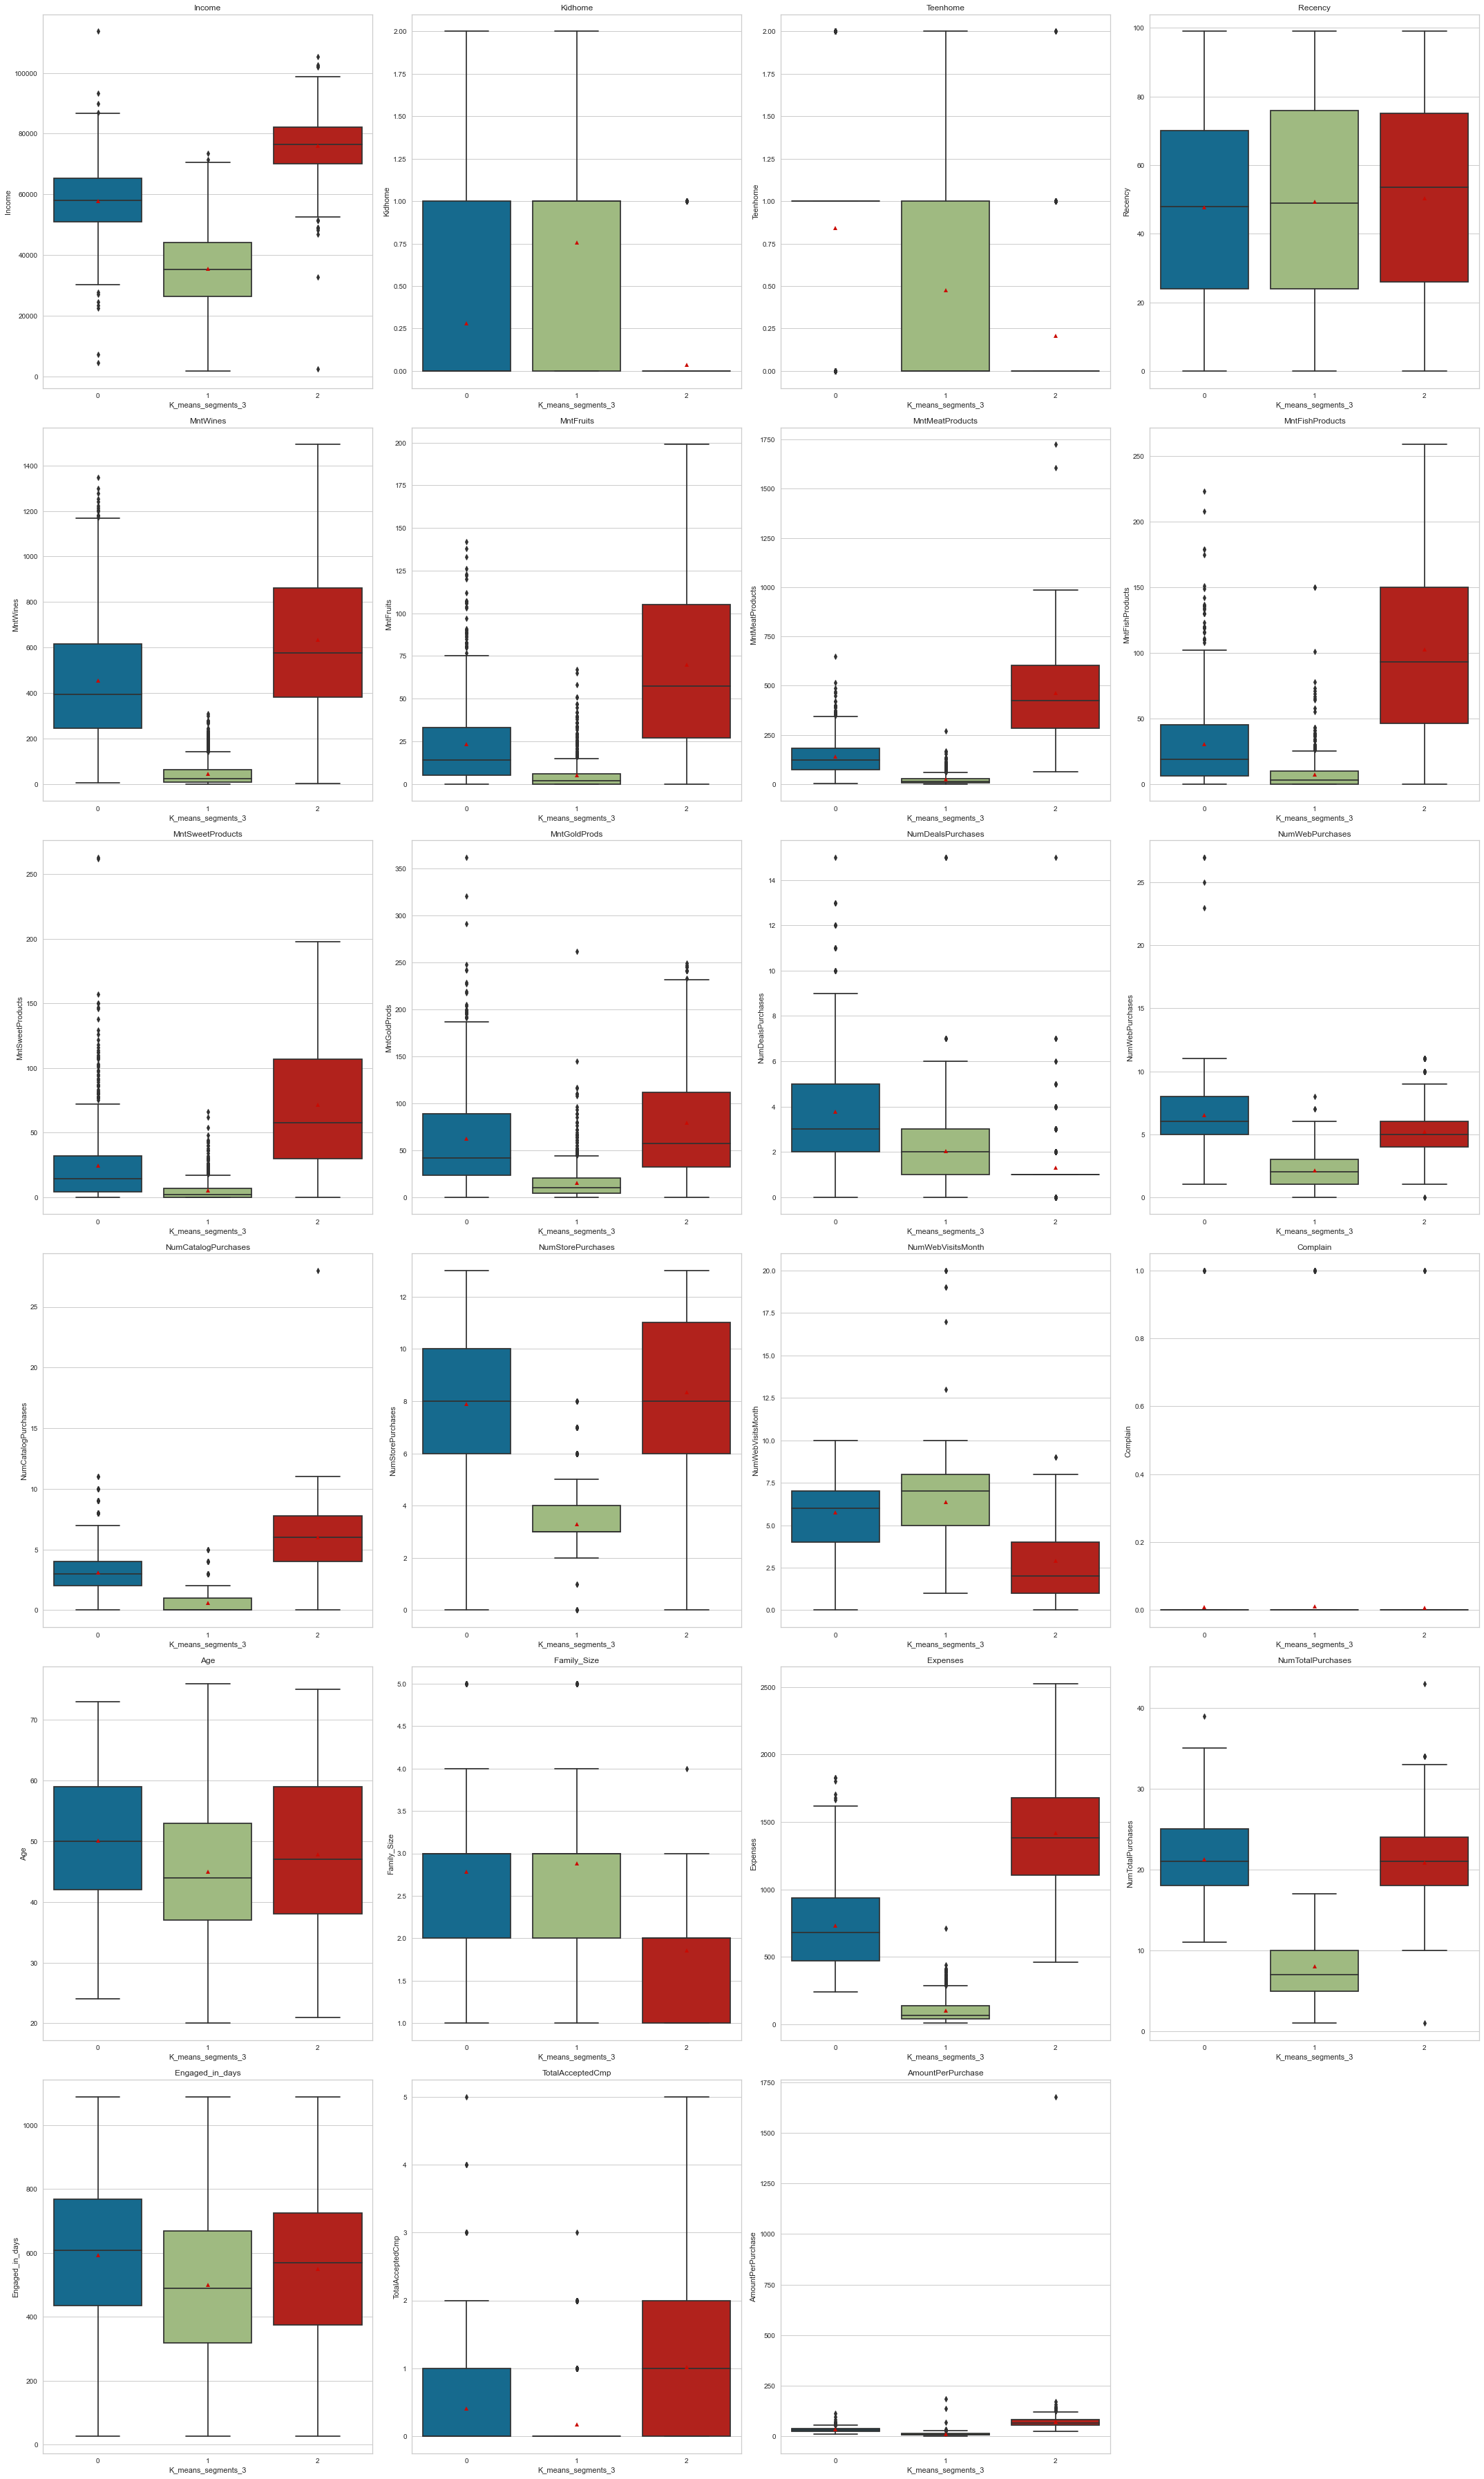

In [ ]:
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=data[variable], x=data['K_means_segments_3'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Characteristics of each cluster**

**Cluster 0:**

* Medium-Income customers with the highest teenhome. 
* Age is high. 
* Amount spent on all the products is medium. 
* Num Deal purchases and Num web purchases are the highest. 
* More Income spent on Wines and Meat products
* Num store purchases are medium. 
* Medium-level web visits. 
* Total acceptance on campaigns is medium. 
* Family size is medium.
* Complain is medium. 
* Longest tenure customers
* Num total purchases are highest and have medium Product purchases rate. 

**Summary for cluster 0:** Customers in this cluster are older and have a medium income, have teenagers in the house, have a large family size, like to buy discounts, and prefer web purchases to store purchases.

**Cluster 1:**

* Lowest - Income customers with the highest kids in their homes. 
* Family Size is High
* Youngest people. 
* Purchases on all the products are low. 
* Num deal purchases are medium. 
* Num web visits are the highest. 
* Not accepted campaigns 
* Complain is highest. 
* Recently enrolled customers. 

**Summary for cluster 1:** This cluster consists of young low-income customers with kids who frequently visit the company website, and are recently joined, customers.



**Cluster 2:** 

* High-Income customers with the lowest Kids and Teens in their homes. 
* Middle-aged customer in the company. 
* Spent more Income on wine, meat, and fish products. 
* Lowest deal purchases. 
* Catalog purchases, Num store purchases, and acceptance are highest. 
* Web purchases are medium. 
* Total purchases and Product purchases are the highest.
* Expenses of the customers are very high
* Medium-tenured customers. 

**Summary for cluster 2:** This cluster consists of Loyal rich middle-aged customers accepting all campaigns, don't have kids/teens, like to spend more and purchase high price products (as product purchase rate is high), prefer to have store purchases, and never look for discounts. 

**Think About It:**
- Are the K-Means profiles with K=3 providing any deep insights into customer purchasing behaviour or which channels they are using?
- What is the next step to get more meaningful insights? 

**Observations and Insights:**
- We can see from the above profiles that K=3 segments the customers into High, Medium and Low-income customers, and there aren't many interesting insights about the behavior of purchase for different clusters.  
- So we'll build K=5(Which has another elbow in the Elbow curve) and see if we can get some interesting insights from cluster profiles.

In [ ]:
# Dropping labels we got from KMeans since we will be using PCA data for prediction.
data_pca.drop("K_means_segments_3", axis=1, inplace=True)
data.drop("K_means_segments_3", axis=1, inplace=True)

**Let's build K-Means using K=5**

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)                # Initializing the KMeans algorithm with 5 clusters

kmeans.fit(data_pca)                                         # Applying on PCA data

KMeans(n_clusters=5, random_state=0)

In [ ]:
data_pca["K_means_segments_5"] = kmeans.labels_                    # Adding KMeans cluster labels to the PCA data

data["K_means_segments_5"] = kmeans.labels_                        # Adding KMeans cluster labels to the whole data

data_model["K_means_segments_5"] = kmeans.labels_                  # Adding KMeans cluster labels to the subset of data

In [ ]:
# Let's check the distribution
data_model["K_means_segments_5"].value_counts()

1    990
4    403
2    344
0    322
3    168
Name: K_means_segments_5, dtype: int64

**Let's visualize the clusters from PCA.**

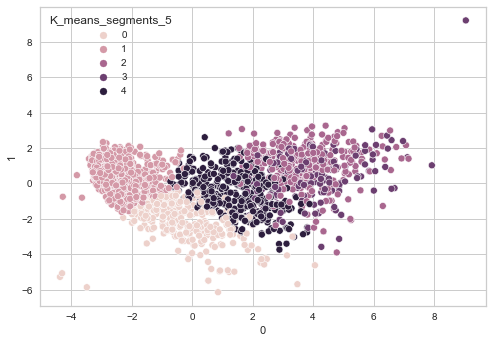

In [ ]:
PCA_PLOT(0, 1, data_pca, "K_means_segments_5")

### **Cluster Profiling**

In [ ]:
# Taking the mean of all the variables by cluster wise
cluster_profile_KMeans = data.groupby("K_means_segments_5").mean()

In [ ]:
cluster_profile_KMeans.style.highlight_max(color="lightgreen", axis=0)

**Let's plot the boxplot**

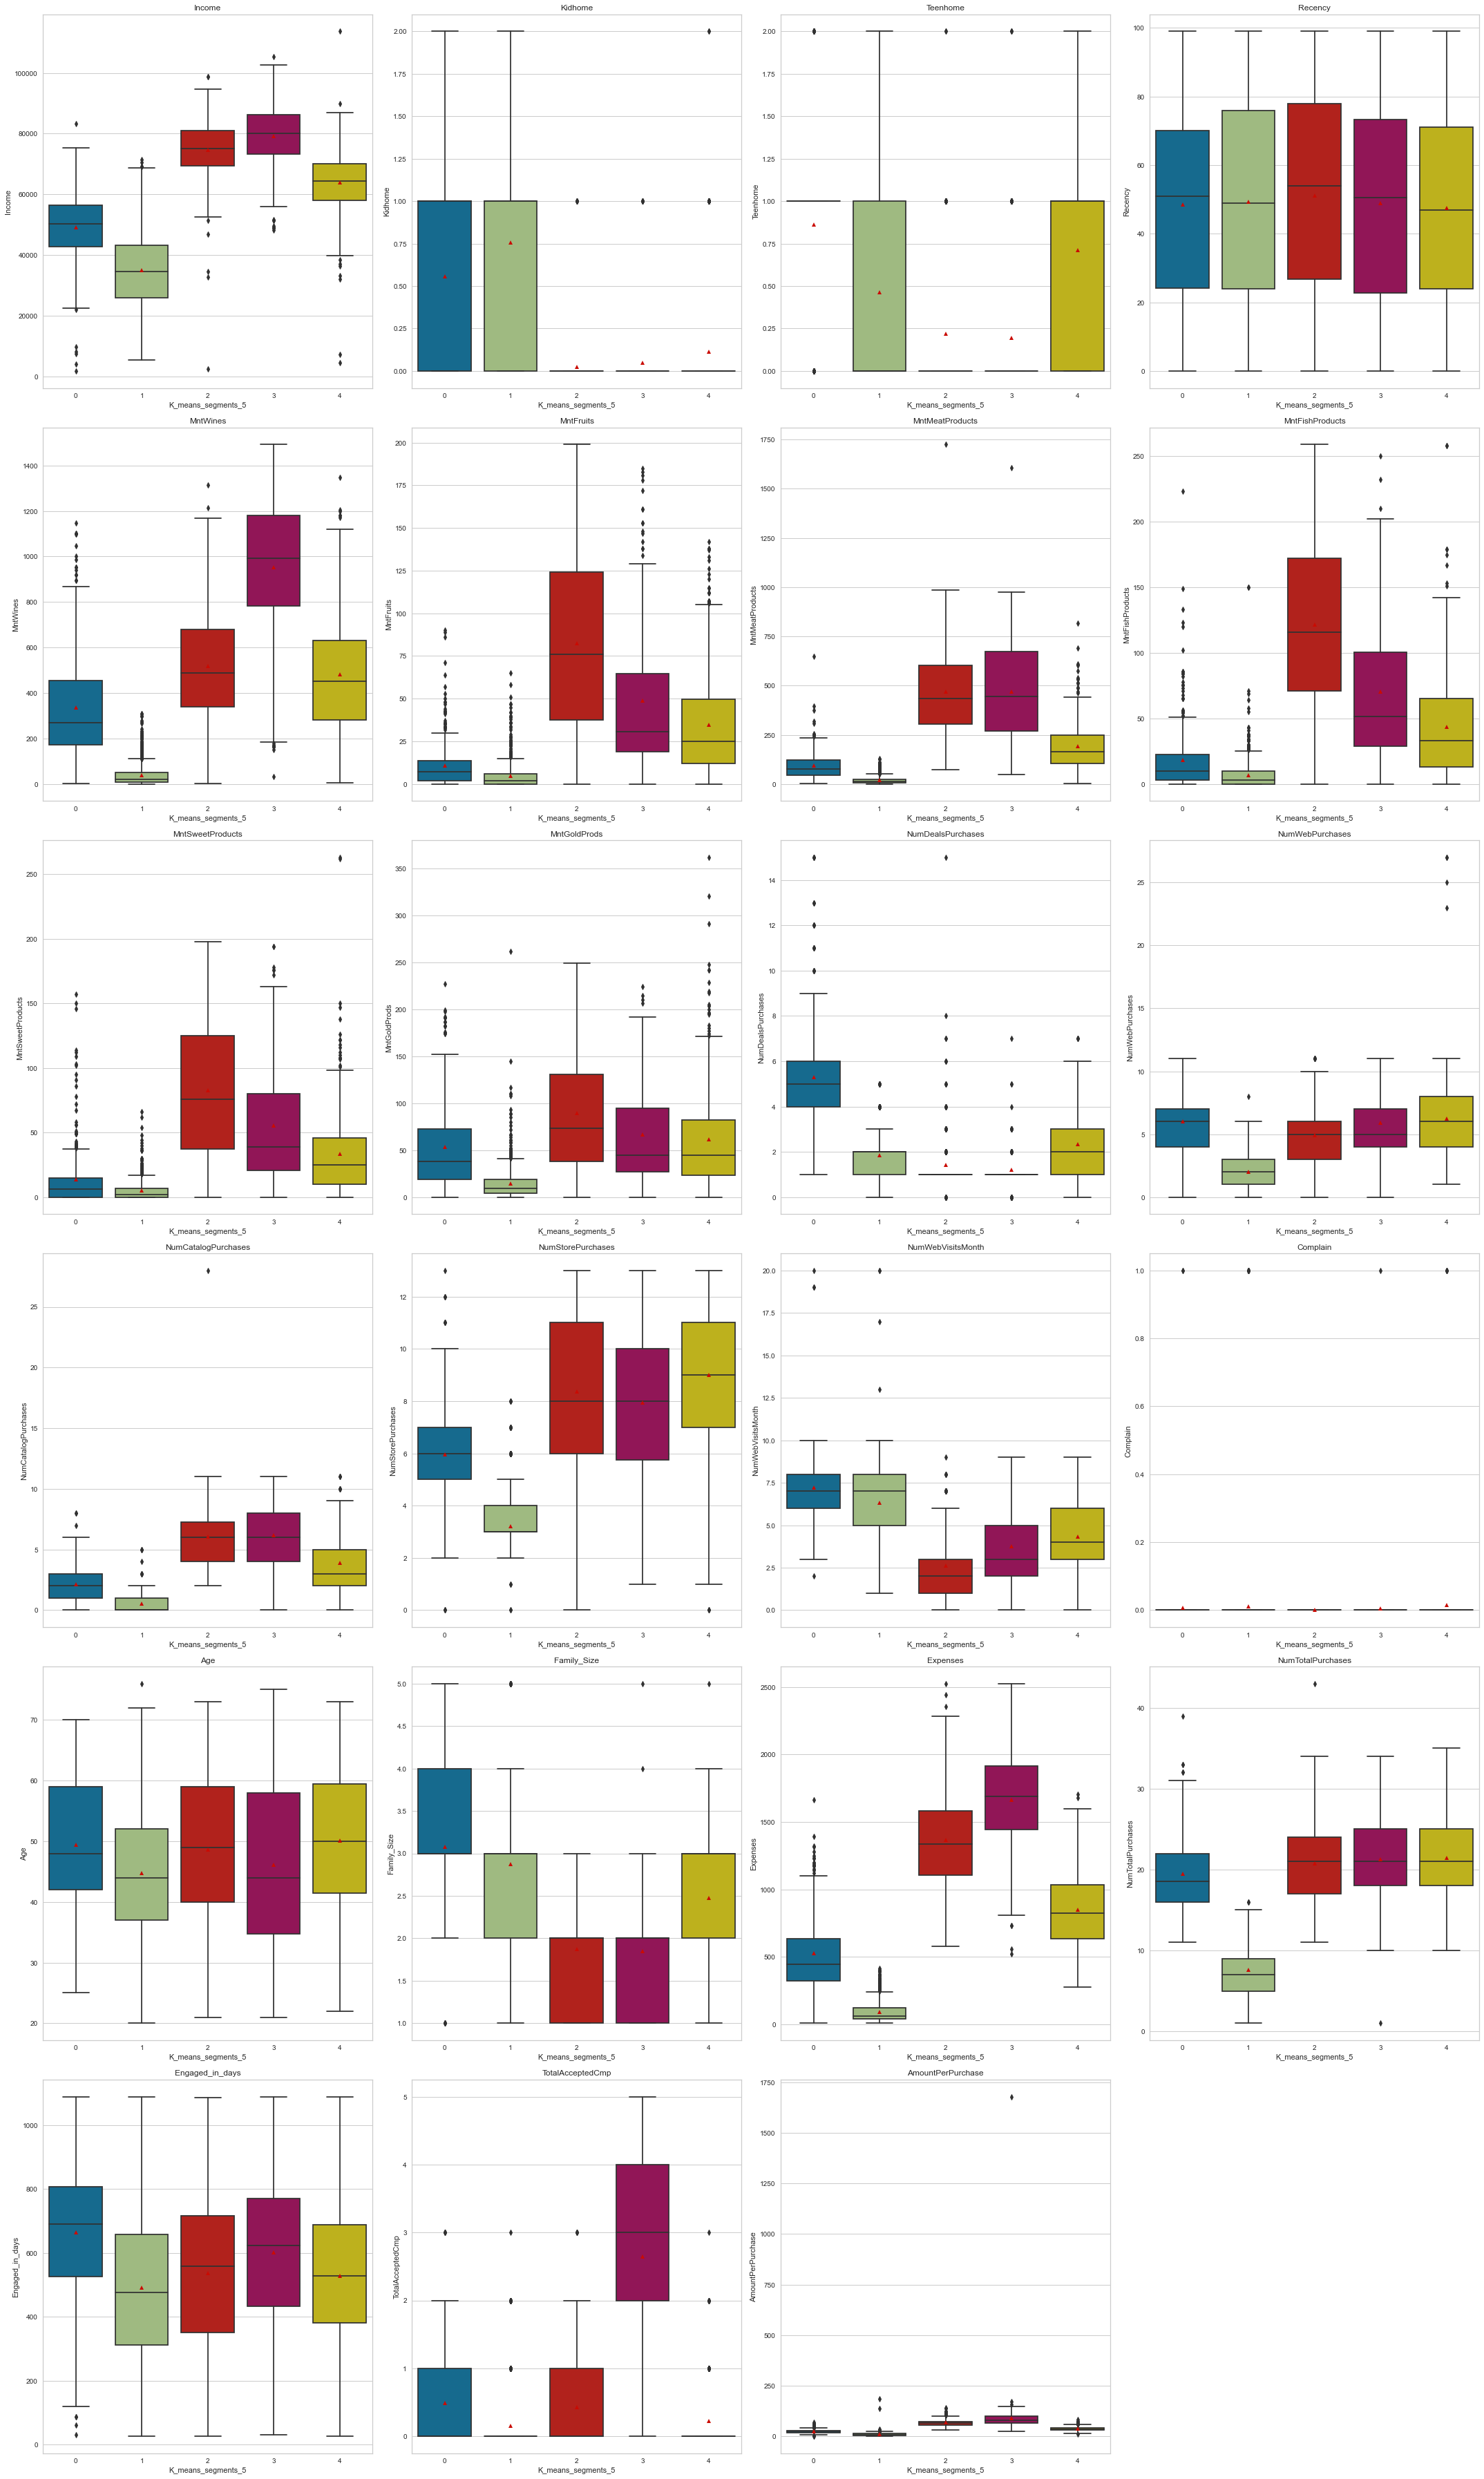

In [ ]:
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=data[variable], x=data['K_means_segments_5'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Characteristics of each cluster**

**Cluster 0:** 

* Second Lowest-Income customers with second highest kids and highest teens in their home. 
* Purchases on all the products are second lowest. 
* Num deal purchases are high. 
* Num web purchases are second highest. 
* Num Catalog and Store purchases are second lowest. 
* Num web visits are highest. 
* Accepted 1, 3, and 4 campaigns.
* Second oldest customers (Age).
* Family size is high. 
* Expenses are second lowest. 
* Total Purchases are second lowest.
* Enrolled long back in the company.
* Amount Per Purchase is the second lowest.

**Summary for cluster 0:** This cluster includes the second-oldest customers with the second-lowest income, who have both children and teenagers, have been with the company for a long time, prefer to buy products on sale, and have accepted a few campaigns with a low product purchase rate.


**Cluster 1:**
* Lowest - Income customers with kids in their homes. 
* Purchases on all the products are low. 
* Num deal purchases are medium. 
* Num web visits are the second highest. 
* Acceptance of campaigns are low. 
* Complain is second highest. 
* Youngest people. 
* Expenses are low. 
* Total Purchases are low. 
* Recently enrolled customers. 
* Amount Per Purchase is also low. 

**Summary for cluster 1:** This cluster consists of young low-income customers with kids who frequently visit the company website, reject campaigns with some complaints, and are new customers. Prefers to buy products at a discount.


**Cluster 2:**
* Second High-Income customers with the lowest Kids and second lowest Teens in their homes. 
* Recency is high. 
* Purchases on all the products are high except for wines. 
* Num Deal purchases are second lowest. 
* Catalog purchases and Store purchases are second highest. 
* Num Web visits are the lowest. 
* Accepted 1st and 5th campaigns. 
* Never complained. 
* Middle-aged customers. 
* Family size is low. 
* Expenses are second highest. 
* Total purchases are third highest. 
* Third long-tenured customers. 
* Amount Per Purchase is second highest. 

**Summary for cluster 2:** This cluster consists of middle-aged rich customers who accept few campaigns, prefer to buy more products and buy from catalogs, and are third-long-tenured customers who never look for discounts.


**Cluster 3:**
* High-Income customers with the second lowest Kids and lowest Teens in their homes. 
* Purchases more wine and has second highest purchases on rest of the products. 
* Lowest deal purchases. 
* Catalog purchases and acceptance are highest. 
* Store purchases are third highest. 
* Web visits are second lowest. 
* Accepted all the campaigns. 
* Second youngest customers.
* Expenses and Amount Per Purchase are highest. 
* Second long-tenured customers.

**Summary for cluster 3:** This cluster consists of Loyal rich young customers who accept all campaigns, do not have kids/teens, prefer to spend more and buy higher-priced products (due to the high product purchase rate), and are second-long-tenured customers who never look for discounts. Prefers catalog purchases and frequents the internet.

**Cluster 4:**

* Medium-Income customers with second highest teenhome. 
* Purchases on all the products are medium. 
* Num Deal purchases are second highest. 
* Num web purchases and Num store purchases are the highest.
* Num web visits are third highest. 
* Acceptance of campaigns are low. 
* Complain is high. 
* Older customers (Age). 
* Expenses are medium. 
* Total purchases are highest. 
* Recently joined customers. 
* Amount per purchase is medium. 

**Summary for cluster 4:** Customers in this cluster are older, have a medium income, have teenagers in the house, have a medium family size, prefer to buy products on sale with some complaints, and prefer both online and in-store purchases.

**Observations and Insights:**

- From the above profiles, K=5 provides more interesting insights about customer's purchasing behavior and preferred channels for purchasing products. 
- We can also see that the High, Medium and Low income groups have different age groups and preferences, which was not evident in K=3.
- So, we can use K=5 for all methods (Algorithms).

In [ ]:
# Dropping labels we got from KMedoids since we will be using PCA data for prediction.
data_pca.drop("K_means_segments_5", axis=1, inplace=True)
data.drop("K_means_segments_5", axis=1, inplace=True)

## **KMedoids**

**Let's find the silhouette score for K=5 in KMedoids**

In [ ]:
clusterer = KMedoids(n_clusters=5, random_state=1)
preds = clusterer.fit_predict((data_pca))
score = silhouette_score(data_pca, preds)
print(score)

0.10752806959275728


**Observations and Insights**:
- When comparing K=5 in KMedoids to K=5 in K-Means, the silhouette score for K=5 in KMedoids is lower. 
- Let's try KMedoids with K=5 and see if we get good cluster profiles.

In [ ]:
kmedo = KMedoids(n_clusters=5, random_state=1)  # Initialize the KMedoids with 5 clusters

kmedo.fit(data_pca)                              # Applying KMedoids on pcs data

KMedoids(n_clusters=5, random_state=1)

In [ ]:
# Predicting on pca data and ddding KMedoids cluster labels to the whole data
data["kmedoLabels"] = kmedo.predict(data_pca)  

# Predicting on pca data and ddding KMedoids cluster labels to the subset of data
data_model["kmedoLabels"] = kmedo.predict(data_pca)  

# Predicting on pca data and ddding KMedoids cluster labels to the PCA data
data_pca["kmedoLabels"] = kmedo.predict(data_pca)  

In [ ]:
# Let's check the distribution
data["kmedoLabels"].value_counts()

3    631
1    578
0    480
2    276
4    262
Name: kmedoLabels, dtype: int64

**Let's visualize the clusters from PCA.**

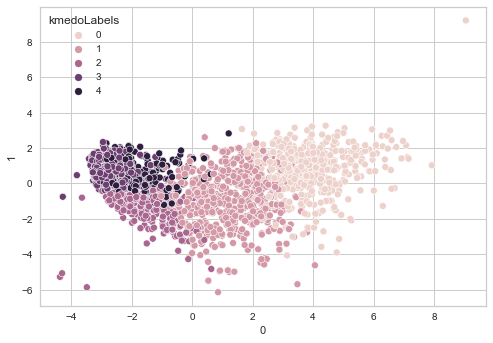

In [ ]:
PCA_PLOT(0, 1, data_pca, "kmedoLabels")

### **Cluster Profiling**

In [ ]:
# Taking the mean of all the variables by cluster wise
cluster_profile_KMds = data.groupby("kmedoLabels").mean()

In [ ]:
# let's display cluster profiles
cluster_profile_KMds.style.highlight_max(color="lightgreen", axis=0)

**Let's plot the boxplot**

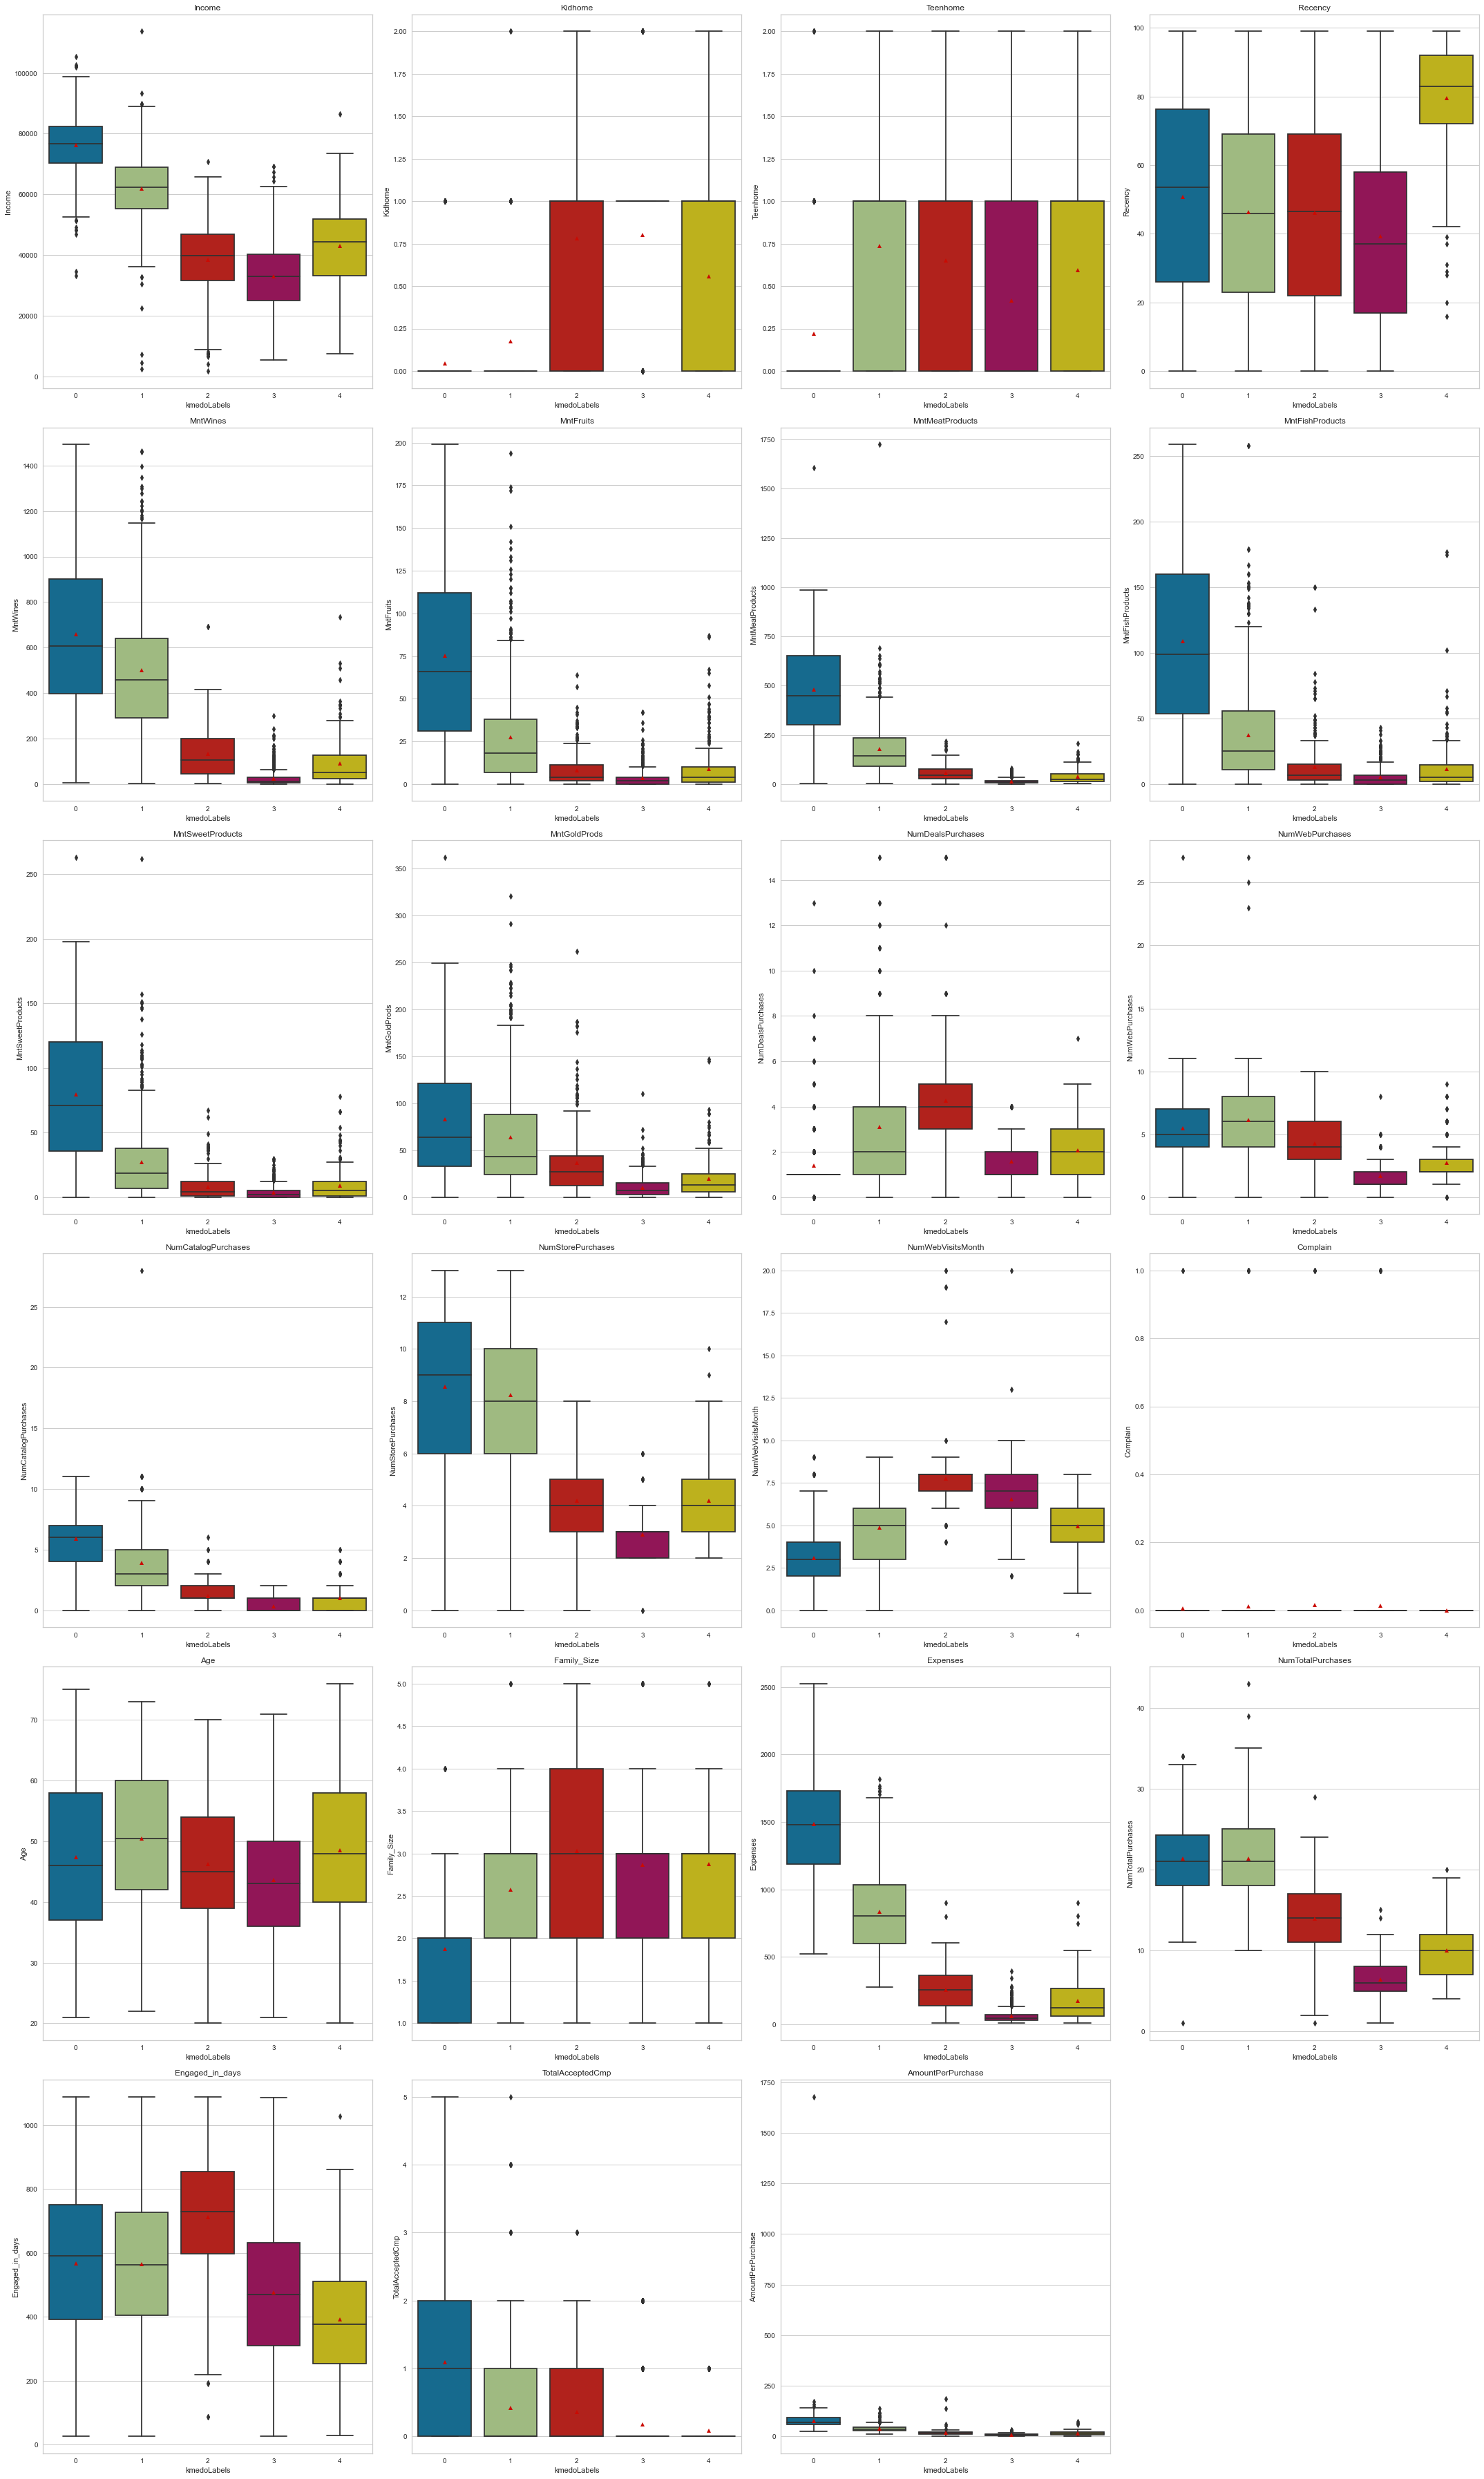

In [ ]:
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=data[variable], x=data['kmedoLabels'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Characteristics of each cluster**

**Cluster 0:** 

* High-Income customers with the lowest Kids and Teens in their homes. 
* Purchases on all the products are high. 
* Num deal purchases are low. 
* Num web purchases are second highest. 
* Num catalog purchases and Num Store purchases are the highest. 
* Num websites are the lowest.
* Accepted all the campaigns. 
* Complain is second lowest. 
* Middle-aged customers. 
* Expenses are highest. 
* Total purchases are second highest. 
* Second long-tenured customers. 
* Amount per purchase is highest. 

**Summary for cluster 0:** This cluster consists of Loyal rich middle-aged customers who accept all campaigns, do not have children/teens, prefer to spend more and buy higher-priced products (due to the high product purchase rate), and are second long-tenured customers who never look for discounts. Prefers both catalog and store purchases. 


**Cluster 1:**

* Second High-Income customers with the second lowest Kids and highest Teens in their homes. 
* Purchases on all the products are second highest. 
* Num web purchases are the highest. 
* Num deal purchases are the second highest
* Num catalog and Num store purchases are second highest. 
* Accepted 4th campaign.
* Oldest customer in the company (Age). 
* Family size is second lowest. 
* Expenses are second highest. 
* Total purchases are highest. 
* Third long-tenured customers. 
* Amount per purchase is second highest. 

**Summary for cluster 1:** This cluster consists of rich old customers having teens who accepted 4th campaigns like to purchase more products, and are third long-tenured customers who look for discounts.

**Cluster 2:**

* Second lowest-income customers with second highest kids and teens in their home. 
* Purchases on all the products are second lowest.
* Num Deal purchases are high. 
* Num web purchases are third highest. 
* Num catalog purchases third highest. 
* Num store purchases are third highest. 
* Num web visits are highest. 
* Accepted last campaign.
* Complain is high. 
* Second youngest customers.
* Family size is big. 
* Expenses are third highest. 
* Enrolled long back with the company. 
* Product per purchase is third highest. 

**Summary for cluster 2:** This cluster contains the second youngest customers with the second lowest income, who have both children and teenagers, have a large family size, visit the company's website frequently, accepted the previous campaign and complained the most, prefer to buy products on discount, and have the third highest product purchase rate.

**Cluster 3:**

* Lowest - Income customers with highest kids and second lowest teens in their homes.
* Purchases on all the products are the lowest. 
* Num web visits are second highest.
* Accepted the 3rd campaign. 
* Complain is second highest. 
* Youngest customers. 
* Family size is the second largest. 
* Num total purchases and Amount per purchase are lowest. 

**Summary for cluster 3:** This cluster consists of young low-income customers with kids who accepted the third campaign, visit the website frequently, and have recently enrolled with the company.


**Cluster 4:**

* Medium-Income customers with third highest kids and teens.
* Recency is high
* Purchases on all the customers are third highest (Medium). 
* Web visits are third highest. 
* Second oldest customers. 
* Acceptance on the campaigns are lowest. 
* Recently enrolled. 
* Amount per purchase is second lowest. 

**Summary for cluster 4:** Customers in this cluster are the second oldest customers and have a medium income, have kids and teenagers in the house, have a big family size, purchase the products once in a while, and recently enrolled with the company. 

In [ ]:
# Dropping labels we got from KMedoids since we will be using PCA data for prediction.
data_pca.drop("kmedoLabels", axis=1, inplace=True)
data.drop("kmedoLabels", axis=1, inplace=True)

## **Hierarchical Clustering**

Let's find the Cophenetic correlation for different distances with different linkage methods.

### **What is a Cophenetic correlation?**

The cophenetic correlation coefficient is a correlation coefficient between the cophenetic distances(Dendrogramic distance) obtained from the tree, and the original distances used to construct the tree. It is a measure of how faithfully a dendrogram preserves the pairwise distances between the original unmodeled data points. 

The cophenetic distance between two observations is represented in a dendrogram by the height of the link at which those two observations are first joined. That height is the distance between the two subclusters that are merged by that link.

Cophenetic correlation is the way to compare two or more dendrograms. 

**Let's calculate Cophenetic correlation for each of the distance metrics with each of the linkage methods.**

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average"]

high_cophenet_corr = 0                                                 # Creating a variable by assigning 0 to it
high_dm_lm = [0, 0]                                                    # Creating a list by assigning 0's to it

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_pca, metric=dm, method=lm)                    # Applying different linkages with different distance on pca data
        c, coph_dists = cophenet(Z, pdist(data_pca))                   # Calculating cophenetic correlation
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:                                     # Checking if cophenetic correlation is higher than previous score
            high_cophenet_corr = c                                     # Appending to high_cophenet_corr list, if it is higher
            high_dm_lm[0] = dm                                         # Appending its corresponding distance
            high_dm_lm[1] = lm                                         # Appending its corresponding method or linkage

Cophenetic correlation for Euclidean distance and single linkage is 0.8063217204308335.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6171288089817475.
Cophenetic correlation for Euclidean distance and average linkage is 0.8619040295688459.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7884037056391834.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7014009350834751.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8121282710675839.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6523737696881117.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6059195021523466.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.643580503090494.
Cophenetic correlation for Cityblock distance and single linkage is 0.809068704788454.
Cophenetic correlation for Cityblock distance and complete linkage is 0.7963434052019069.
Cophenetic correl

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8671371105092283, which is obtained with Cityblock distance and average linkage.


#### **Let's have a look at the dendrograms for different linkages with Cityblock distance**

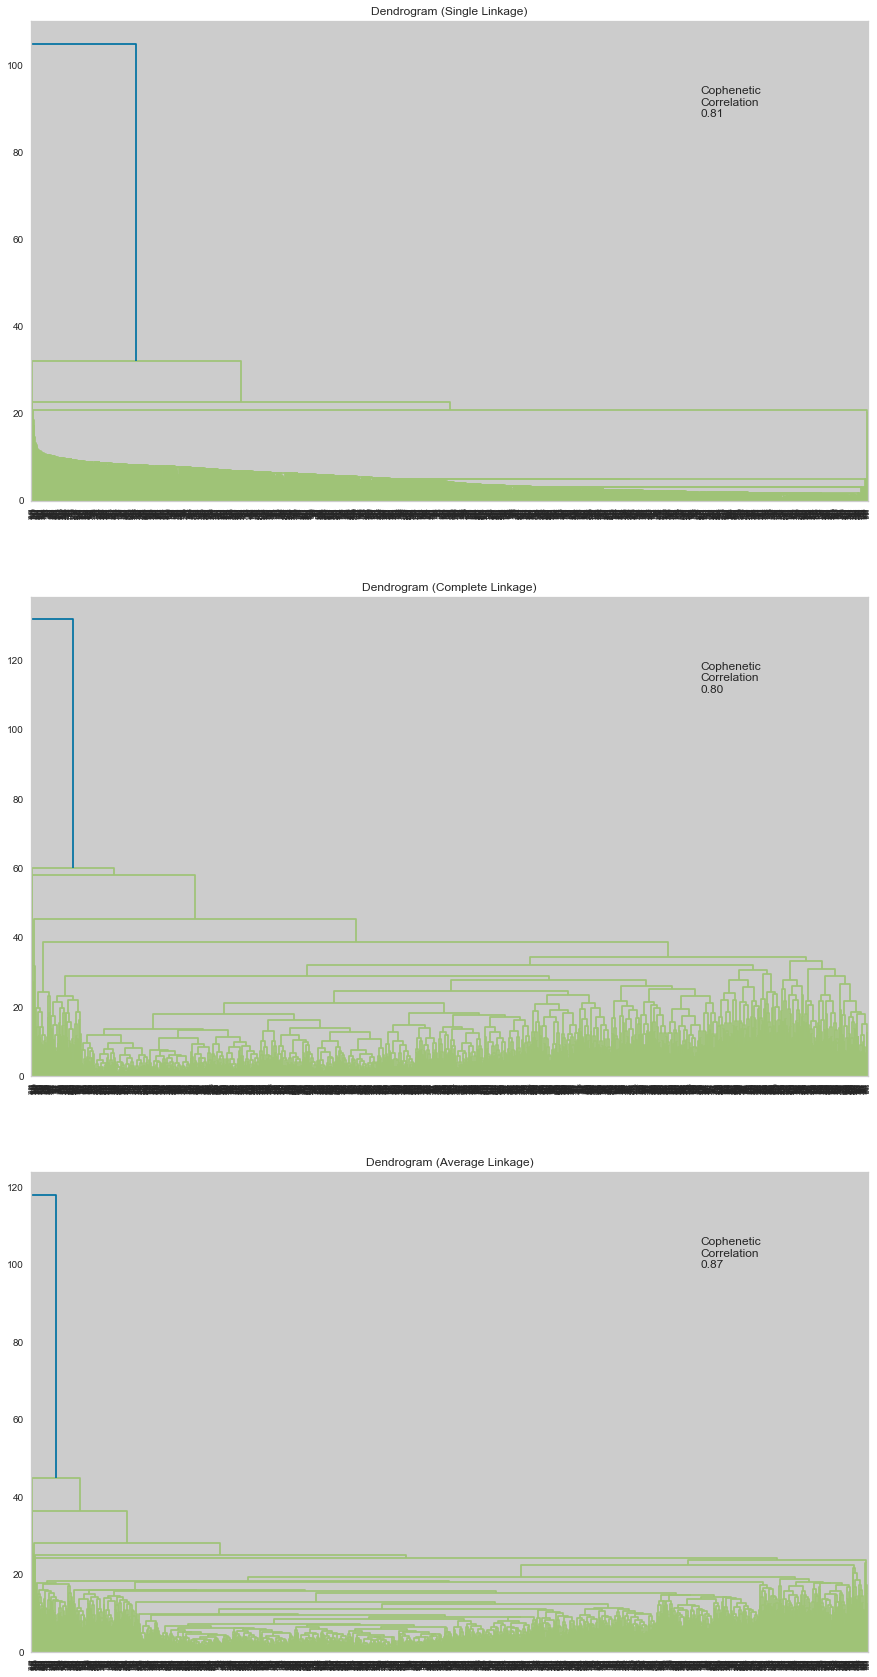

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Cityblock", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                        # Finding cophenetic correlating for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Think about it:**

- Are there any distinct clusters in any of the dendrograms?
- What is the next step in obtaining distinct dendrogram clusters?

**Observations and Insights:**

* `Single Linkage`: About 70% of the data points are clustered into one cluster. 
* `Complete Linakge`: Same, about 70% of the data points are clustered into one cluster. 
* `Average Linkage`: No distinct clusters are formed.

**We can see from the above dendrograms with City block distance that there are no distinct clusters in any of the dendrograms. So, let's explore the different linkages with Chebyshev distance.**

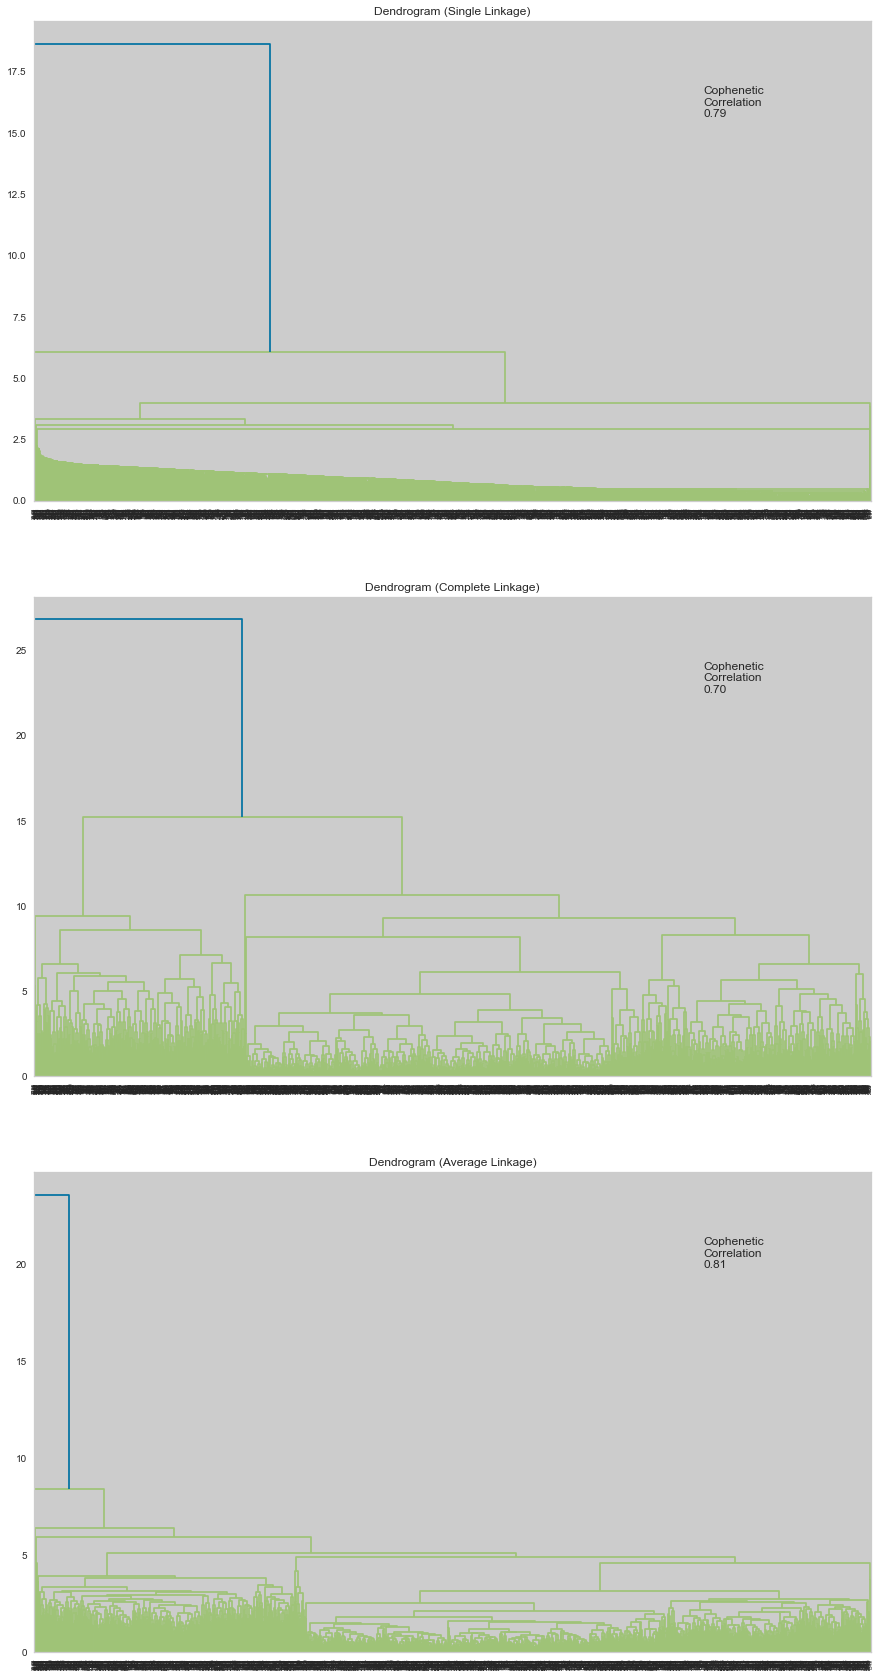

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Chebyshev", method=method)                 # Finding the distance

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")          # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                      # Finding cophenetic correlating for different linkages with Chebyshev distance
    axs[i].annotate(f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",(0.80, 0.80),xycoords="axes fraction",)

**Observations and Insights:**

* `Single Linkage`: About 70% of the data points are clustered into one cluster.
* `Complete Linkage`: There are 3 clear clusters that are visible and but one of the clusters will have only one data point.
* `Average Linkage`: No distinct clusters are observed. 

**We can see from the above dendrograms with Chebyshev distance that there are no distinct clusters in any of the dendrograms. So, let's explore the different linkages with Mahalanobis distance.**

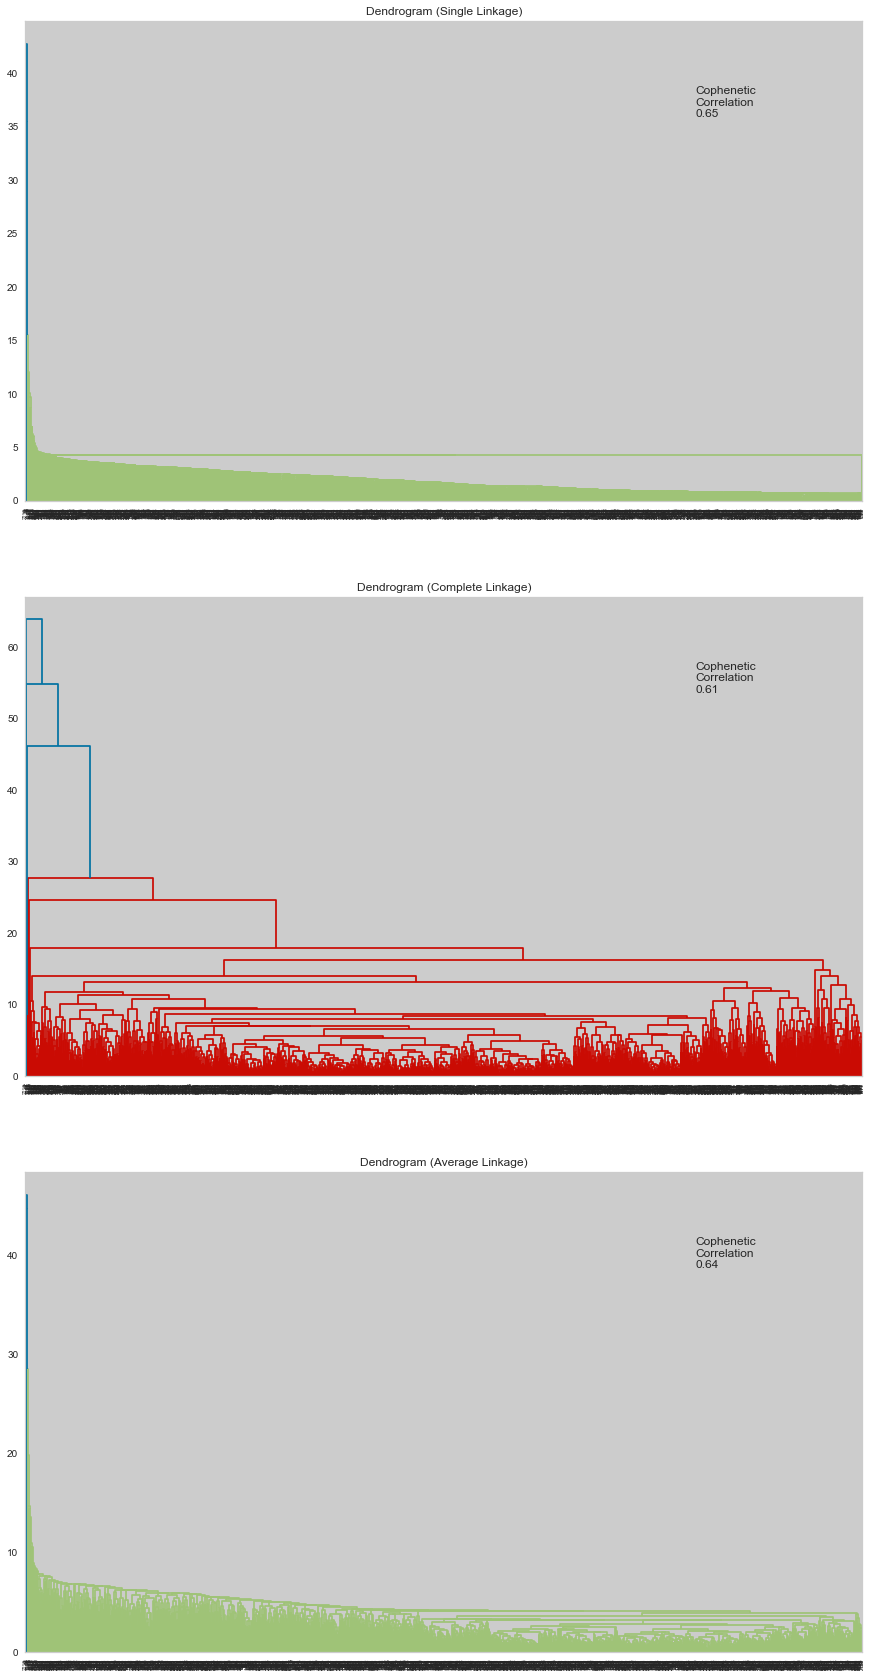

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Mahalanobis", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))  # Finding cophenetic correlating for different linkages with Mahalanobis distance
    axs[i].annotate(f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",(0.80, 0.80),xycoords="axes fraction",)

**Observations and Insights:**

* `Single Linkage`: No distinct clusters are formed.
* `Complete Linkage`: About 70% of the data points are clustered into one cluster.
* `Average Linkage`: No distinct clusters are formed.

**We can see from the above dendrograms with Mahalanobis distance that there are no distinct clusters in any of the dendrograms. So, let's explore the different linkages with Euclidean distance.**

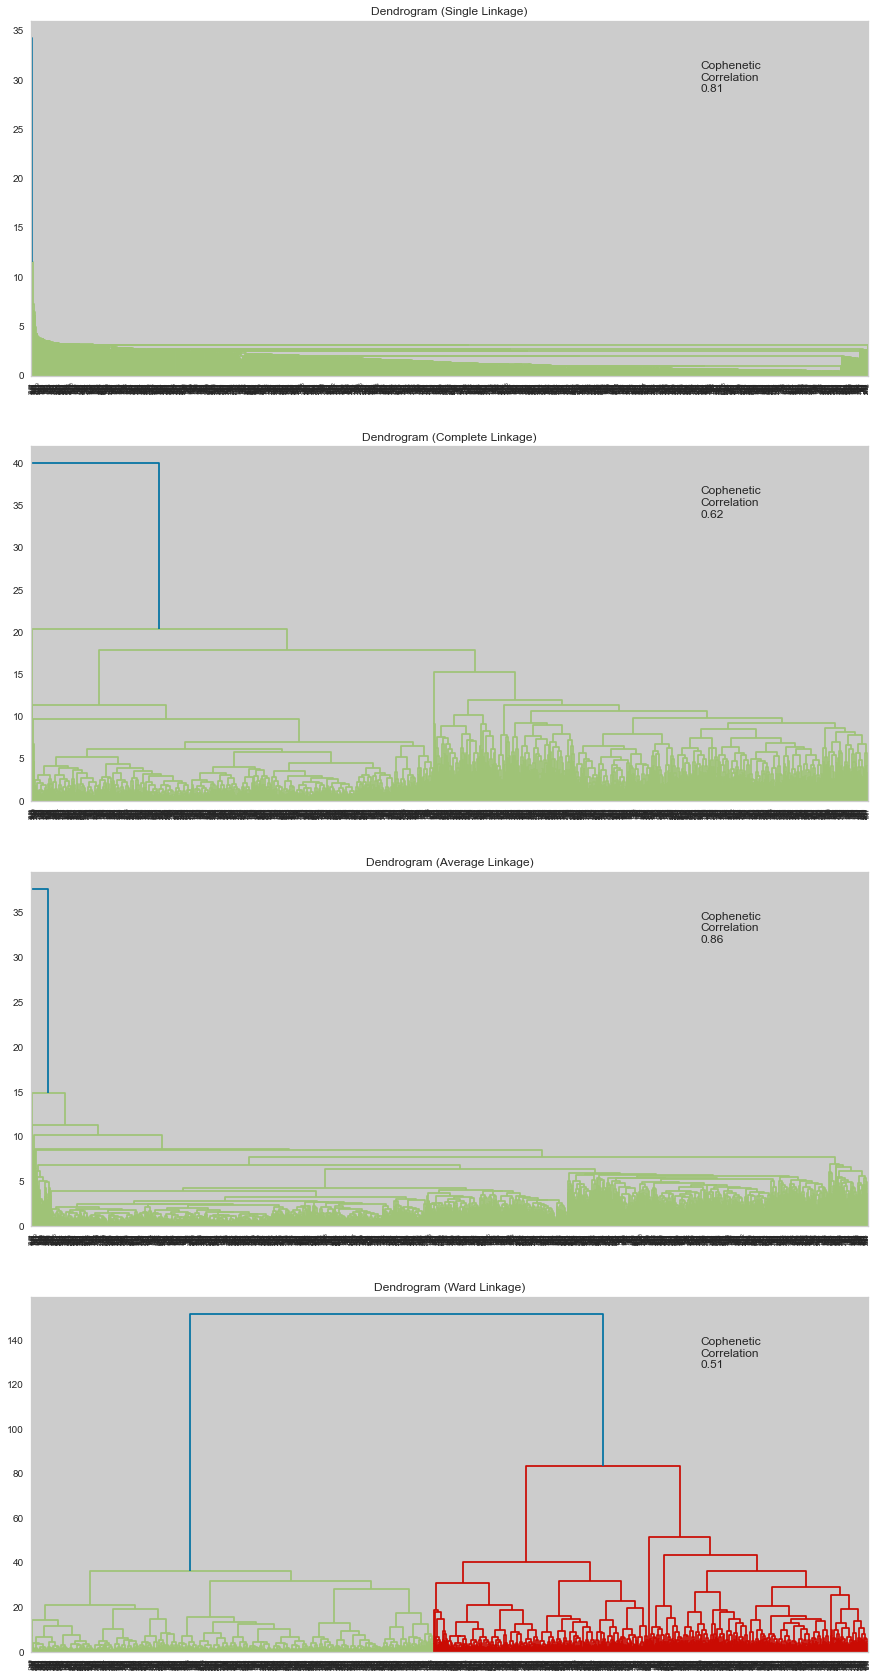

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "ward"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                        # Finding cophenetic correlating for different linkages with Euclidean distance
    axs[i].annotate(f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",(0.80, 0.80),xycoords="axes fraction",)

**Think about it:**

- Are there any distinct clusters in any of the dendrograms?

**We can see from the dendrogram above that ward linkage with Euclidean distance results in three clusters. So, let's try Agglomerative clustering with K=3 and see if we can get some good cluster profiles.**

In [ ]:
# Initializing Agglomerative Clustering with distance as Euclidean, linkage as ward with clusters=3
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward",) 

# Fitting on PCA data
HCmodel.fit(data_pca)                                                                  

AgglomerativeClustering(n_clusters=3)

In [ ]:
data_pca["HC_Clusters_ward"] = HCmodel.labels_            # Adding Agglomerative Clustering cluster labels to the PCA data

data["HC_Clusters_ward"] = (HCmodel.labels_)             # Adding Agglomerative Clustering cluster labels to the original data

data_model["HC_Clusters_ward"] = HCmodel.labels_         # Adding Agglomerative Clustering cluster labels to the subset data

In [ ]:
# Printing the distribution of each cluster
data["HC_Clusters_ward"].value_counts()

1    1072
0     583
2     572
Name: HC_Clusters_ward, dtype: int64

**Let's visualize the clusters from PCA.**

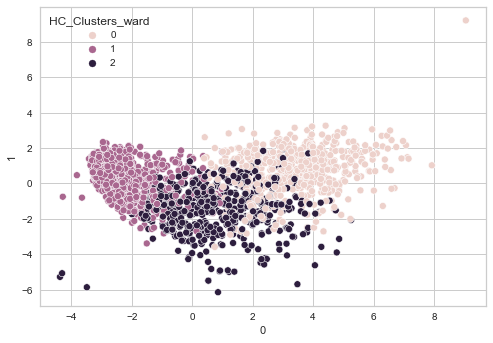

In [ ]:
PCA_PLOT(0, 1, data_pca, "HC_Clusters_ward")

## **Cluster Profiling**

In [ ]:
cluster_profile_3_HC = data.groupby("HC_Clusters_ward").mean()

In [ ]:
# let's display cluster profiles
cluster_profile_3_HC.style.highlight_max(color="lightgreen", axis=0)

**Plotting the boxplot**

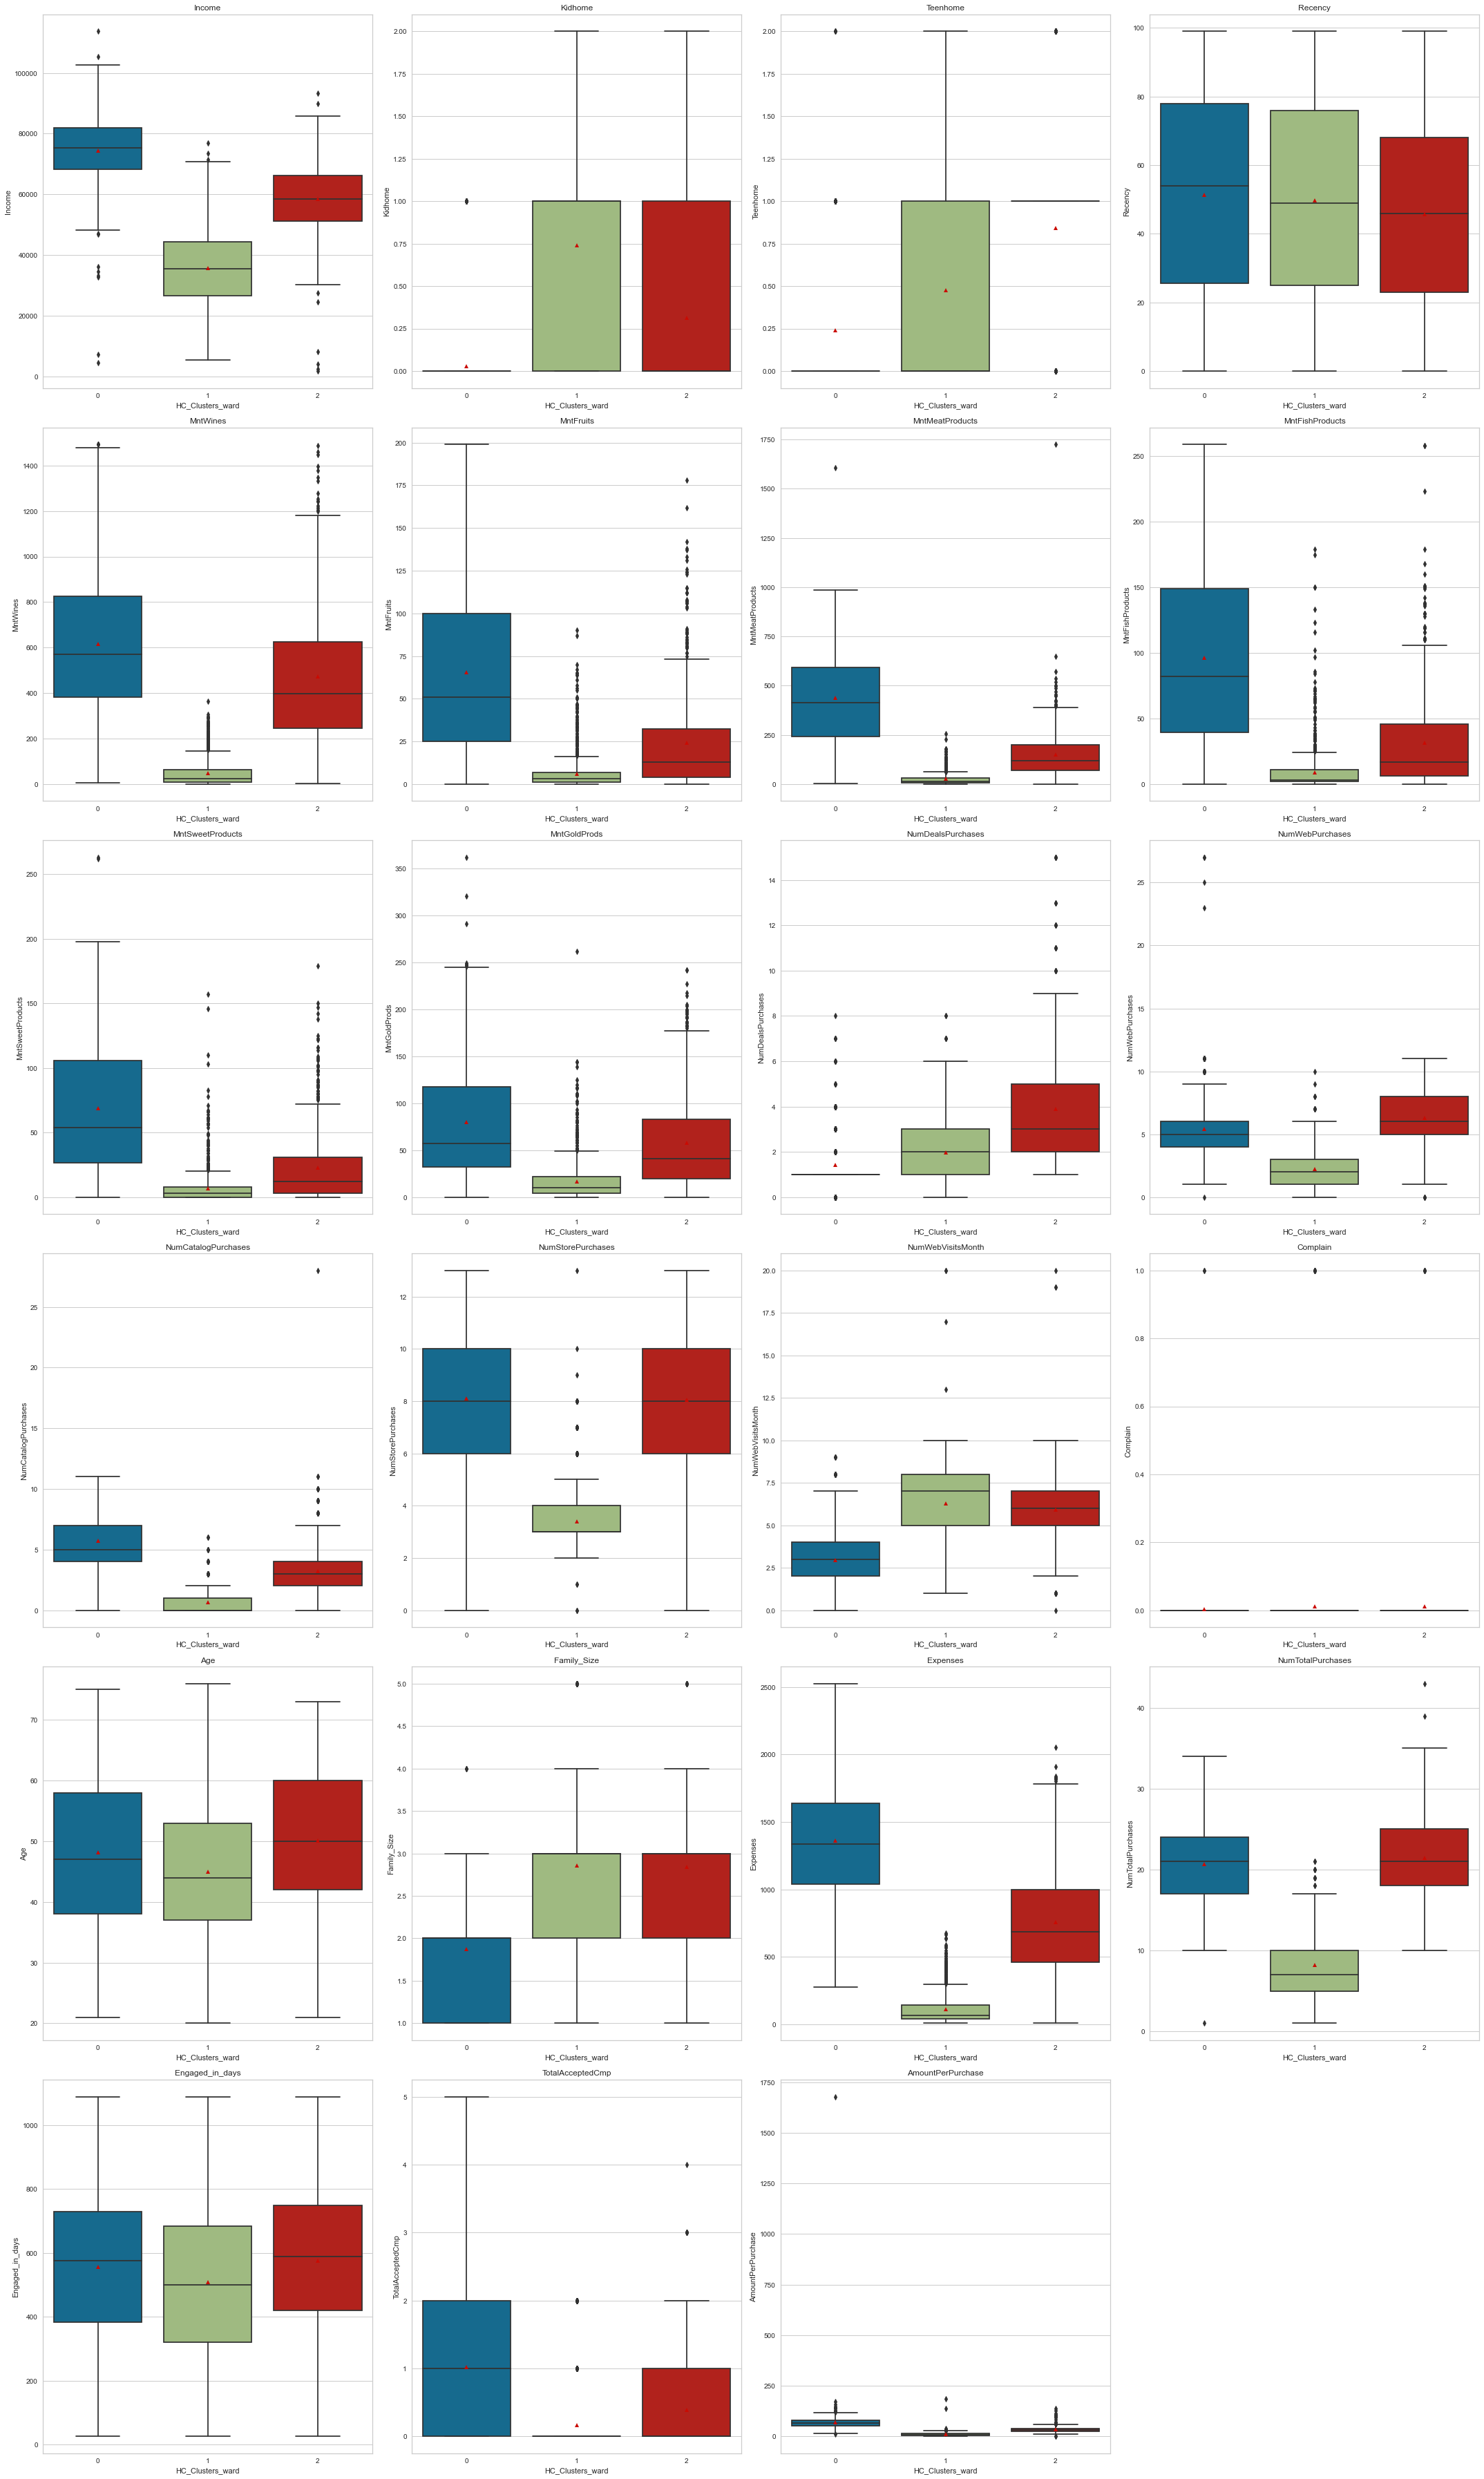

In [ ]:
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=data[variable], x=data['HC_Clusters_ward'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Characteristics of each cluster**

**Cluster 0:**

* High-Income customers with the lowest Kids and Teens in their homes. 
* Middle-aged customer in the company. 
* Expenses were high, spent more Income on Wines and meat.
* Lowest deal purchases. 
* Catalog purchases, Num store purchases, and campaign acceptance are highest. 
* Web purchases are medium. 
* Total purchases are medium, and Product purchases are the highest.
* Medium-tenured customers. 

**Summary for cluster 0:** This cluster consists of Loyal rich middle-aged customers accepting all campaigns, don't have kids/teens, like to spend more and purchase high price products (as product purchase rate is high), prefer to have store purchases, and never look for discounts. 


**Cluster 1:**

* Lowest Income customers with kids in their homes. 
* Youngest people. 
* Purchases on all the products are low. 
* Num deal purchases are medium. 
* Haven't accepted 1st and 5th campaigns
* Web Purchases, Catalog purchases, and Store purchases are low.
* Highest Num web visits. 
* High Family size 
* Complain is medium with the lowest Response. 
* Recently enrolled customers. 

**Summary for cluster 1:** This cluster consists of young low-income customers with kids who frequently visit the company website, low web purchases, and store purchases, and they are recently joined, customers. 

**Cluster 2:**

* Medium-Income customers with the highest teenhome. 
* Age is high. 
* Amount spent on all the products is medium. 
* Num Deal purchases and Num web purchases are the highest. 
* More Income spent on Wines and Meat products
* Num store, Num Catalog, and Num Web visits purchases are medium. 
* Total acceptance on campaigns is medium. 
* Family size is medium.
* Complain is highest.
* Longest tenure customers
* Num total purchases are highest and have medium Product purchases rate. 


**Summary for cluster 2:** Customers in this cluster are older and have a medium income, have teenagers in the house, have a large family size, like to buy discounts, and prefer web purchases to store purchases.

**Think about it:**

- Did the ward linkage with Euclidean distance provide any additional information or deep insights?

**Observations and Insights:**

-  From Hierarchical clustering, also we are getting the same insights that we got for K=3 in K-means.

In [ ]:
# Dropping labels we got from Hierarchical clustering since we will be using PCA data for prediction.
data_pca.drop("HC_Clusters_ward", axis=1, inplace=True)
data.drop("HC_Clusters_ward", axis=1, inplace=True)

## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. 
It includes two hyperparameters, `eps`, and `min samples`.

Because it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different set combinations of values and finding the silhouette score for each of them.

In [ ]:
# initializing lists
eps_value = [2,3]  # Taking random eps value
min_sample_values = [6,20]  # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}  

In [ ]:
# Finding the silhouette_score for each of the combination
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps=i, min_samples=j).fit(data_pca)               # Applying DBScan to each of the combination in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(data_pca, labels)           # Finding silhouette score 
        print( 
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                          # Printing the silhouette score for each of the combination
        )
        if high_silhouette_avg < silhouette_avg:                     # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j              
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =6 The average silhoutte_score is : 0.1991406988326322
For eps value =2 For min sample =20 The average silhoutte_score is : 0.3389144662235068
For eps value =3 For min sample =6 The average silhoutte_score is : 0.3363169240280938
For eps value =3 For min sample =20 The average silhoutte_score is : 0.33988515688502113


In [ ]:
# Printing the highest silhouette score
print(
    "Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(
        high_silhouette_avg, high_i_j[0], high_i_j[1]
    )
)

Highest_silhoutte_avg is 0 for eps = 3 and min sample = 20


**Now, let's apply DBSCAN for the best hyperparameter which we got.**

In [ ]:
# Applying DBSCAN with eps as 3 and min sample as 20
dbs = DBSCAN(eps=3, min_samples=20)

In [ ]:
data["DBSLabels"] = dbs.fit_predict(data_pca)                   # Adding DBSCAN cluster labels to the original data

data_model["DBSLabels"] = dbs.fit_predict(data_pca)             # Adding DBSCAN cluster labels to the subset data

data_pca["DBSLabels"] = dbs.fit_predict(data_pca)               # Adding DBSCAN cluster labels to the PCA data

In [ ]:
# Distribution of each cluster
data["DBSLabels"].value_counts()

 0    1905
-1     322
Name: DBSLabels, dtype: int64

**Let's visualize the clusters from PCA.**

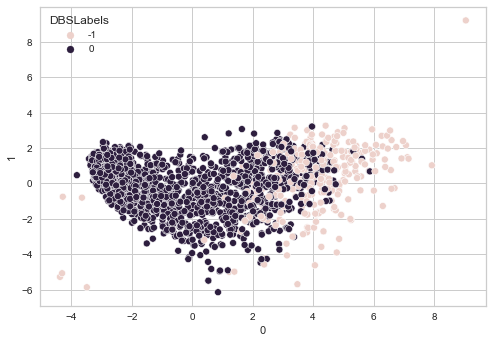

In [ ]:
PCA_PLOT(0, 1, data_pca, "DBSLabels")

**Think about it:**

- Changing the eps and min sample values will result in different DBSCAN results? 

**Observations and Insights:**

- DBSCAN was able to give only two clusters with eps=3 and min_sample=20 which is very skewed.  

**Experiment with different eps and min sample values to see if DBSCAN produces good distribution and cluster profiles.**

In [ ]:
# Dropping labels we got from KMeans since we will be using PCA data for prediction. 
data_pca.drop("DBSLabels", axis=1, inplace=True)
data.drop("DBSLabels", axis=1, inplace=True)

## **Gaussian Mixture Model**

#### Let's find the silhouette score for K=5 in Gaussian Mixture

In [ ]:
clusterer = GaussianMixture(n_components=5, random_state=1)
preds = clusterer.fit_predict((data_pca))
score = silhouette_score(data_pca, preds)
print(score)

0.13722805795148263


**Observations and Insights:**

- When comparing K=5 in Gaussian Mixture to K=5 in KMedoids, the silhouette score for K=5 in Gaussian Mixture is greater, but it is less when compared to k=5 in KMeans.  
- Let's try Gaussian Mixture with K=5 and see if we get good cluster profiles.

In [ ]:
# Let's apply Gaussian Mixture
gmm = GaussianMixture(n_components=5, random_state=1)  # Initializing the Gaussian Mixture model with K=5

gmm.fit(data_pca)                                      # Fitting on PCA data

GaussianMixture(n_components=5, random_state=1)

In [ ]:
data["GmmLabels"] = gmm.predict(data_pca)                   # Adding GMM cluster labels to the original data

data_model["GmmLabels"] = gmm.predict(data_pca)             # Adding GMM cluster labels to the subset data

data_pca["GmmLabels"] = gmm.predict(data_pca)               # Adding GMM cluster labels to the PCA data

In [ ]:
# Checking the distribution of each cluster
data["GmmLabels"].value_counts()

1    742
3    576
2    468
0    405
4     36
Name: GmmLabels, dtype: int64

**Let's visualize the clusters from PCA and TSNE.**

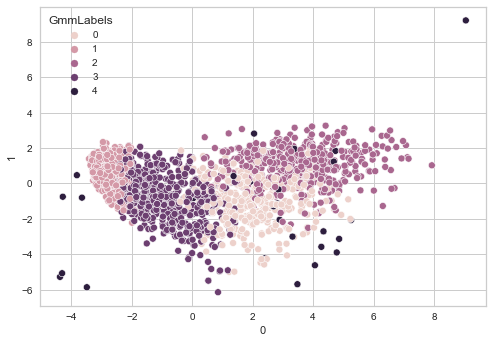

In [ ]:
PCA_PLOT(0, 1, data_pca, "GmmLabels")

### **Cluster Profiling**

In [ ]:
# Taking the mean of all the variables cluster wise
cluster_profile_GMM = data.groupby("GmmLabels").mean()

In [ ]:
# let's display cluster profiles
cluster_profile_GMM.style.highlight_max(color="lightgreen", axis=0)

**Let's plot the boxplot**

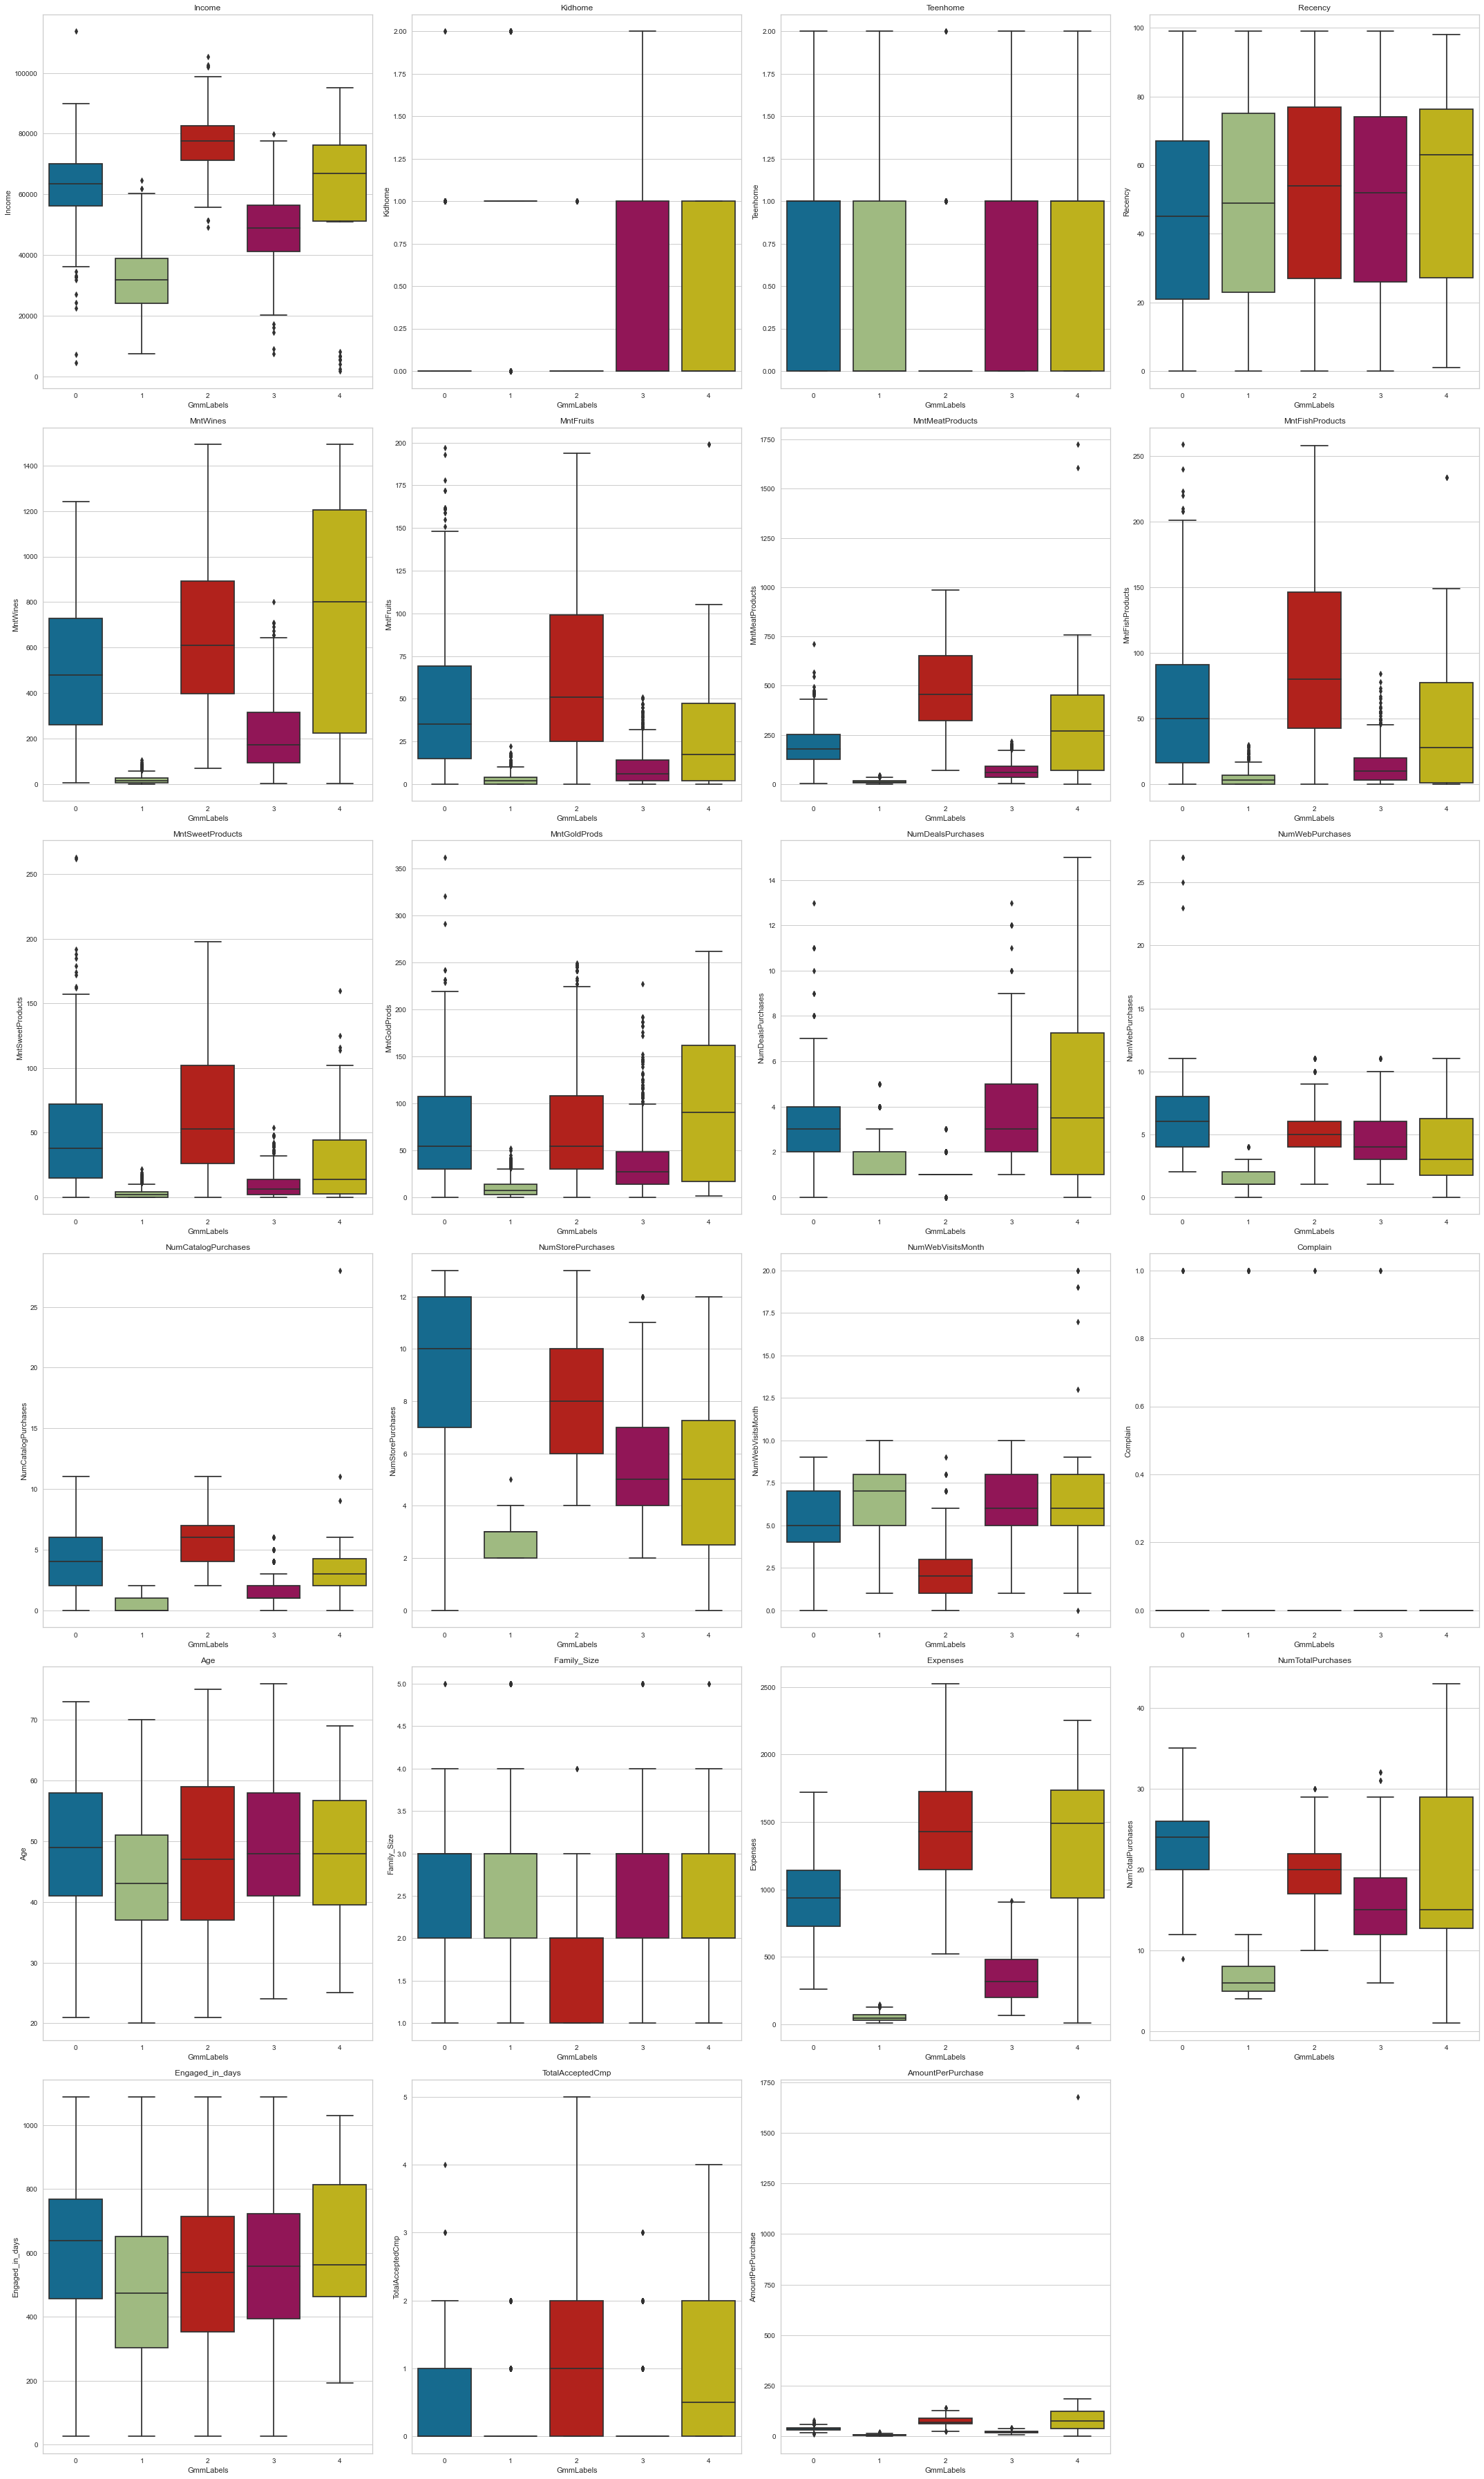

In [ ]:
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=data[variable], x=data['GmmLabels'])
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Characteristics of each cluster**

**Cluster 0:** 

* Second High-Income customers with the second lowest Kids and third highest Teens in their homes. 
* Purchases on all the products are second highest except for Wine and Gold products. 
* Num deal purchases are third highest. 
* Catalog purchases are second highest. 
* Num store purchases are highest. 
* Num web visits are second lowest. 
* Third highest acceptance on campaigns. 
* Complain is second highest. 
* Older customers. 
* Family size is second highest. 
* Expenses are third highest. 
* Num total purchases are highest. 
* Enrolled long back. 
* Amount purchase rate is third highest. 

**Summary for cluster 0:** This cluster consists of older rich customers who accept campaigns moderately, as well as teenagers at home who prefer to buy more products with discounts and complaints and have been with the company for a long time. Prefers to shop in stores.

**Cluster 1:**

* Lowest - Income customers with the highest kids in their homes. 
* Purchases on all the products are low. 
* Num deal purchases are second lowest. 
* Num web purchases are the lowest. 
* Num store purchases are the lowest. 
* Num web visits are second highest. 
* Acceptance of campaigns are lowest. 
* Complain is highest. 
* Youngest customers. 
* Family size is highest. 
* Lowest total purchases. 
* Recently enrolled with the company. 

**Summary for cluster 1:** This cluster consists of young low-income customers with kids who visit the company website frequently and have recently joined, and customers whose purchases are low with a high complaint rate.


**Cluster 2:**

* High-Income customers with the lowest Kids and Teens in their homes.
* Purchases on all the products are highest except for Wine and Gold which is second highest. 
* Num deal purchases are the lowest. 
* Num catalog purchases are the highest. 
* Num store purchases are second highest. 
* Num web visits are the lowest. 
* Accepted 1st, 5th, and last campaigns. 
* Second youngest customers. 
* Num total purchases are second highest. 
* Amount purchase rate is second highest. 

**Summary for cluster 2:** This cluster consists of Loyal rich young customers accepting all campaigns, don't have kids/teens, like to spend more, and never look for discounts. Prefers catalog purchases.

**Cluster 3:**

* Second lowest-income customers with second highest kids and teens in their home. 
* Amount spent on all the products are second lowest. 
* Num deal purchases are second highest. 
* Num web visits are third highest. 
* Num web purchases are third highest. 
* Acceptance on campaigns is second lowest.
* Second oldest customers. 
* Family size is second highest. 
* Num total purchases are second lowest. 


**Summary for cluster 3:** This cluster contains the second-oldest customers with the second-lowest income, who have both kids and teens, have a second large family size and have a low campaign acceptance rate with a low product purchase rate. Prefers deal purchases. 

**Cluster 4:**

* Medium-Income customers with the highest teenhome. 
* Recency is highest. 
* Purchase on Wine and Gold are highest and rest on other products are third highest. 
* Num deal purchases are highest. 
* Num web and catalog purchases are third highest. 
* Num web visits are highest. 
* Accepted 2nd,3rd, and 4th campaigns. 
* Complain is lowest. 
* Third youngest customers. 
* Num total purchases are third highest. 
* Amount purchase rate is highest. 
* Second long-tenured customers.

**Summary for cluster 4:** Customers in this cluster are the third youngest customers and have a medium income, they have teenagers in the house, they spend more money on wine and gold, they accept most campaigns and prefer to buy on discounts, and they prefer deal purchases.

In [ ]:
# Dropping labels we got from KMeans since we will be using PCA data for prediction. 
data_pca.drop("GmmLabels", axis=1, inplace=True)
data.drop("GmmLabels", axis=1, inplace=True)

## Conclusion and Recommendations